In [1]:
# import os
# os.environ['KMP_DUPLICATE_LIB_OK']='True'


import uproot3 as up
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from copy import copy, deepcopy
import sklearn as sk
import math
import matplotlib.colors as mcolors


#usual imports
import numpy as np
import pandas as pd
import xgboost as xg
import uproot3 as upr
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import roc_auc_score, roc_curve
from os import path, system




%matplotlib inline

from xgboost import XGBClassifier


from tools.bdt_trainer import train_bdt
from tools.bdt_vars import bdt_vars
from tools.bdt_trainer import prepareSB
from tools.ntuple_meta import *
from tools.xgboost2tmva import *

%load_ext autoreload
%autoreload 2


matplotlib.style.available
matplotlib.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = [4, 3]
plt.rcParams['figure.dpi'] = 200





# with open('bdt_opt_params.pickle','rb') as handle:
#     bdt_params_opt = pickle.load(handle)

In [2]:
era = "Era2018RR"
dataset_anom_WH = read_data(f'data_files/2021_11_09/{era}/wh_anom/*root')
dataset_anom_ZH = read_data(f'data_files/2021_11_09/{era}/zh_anom/*root')

In [3]:
#available signals
WHsig_list = list(dataset_anom_WH['wh'].keys())
WHsig_list.remove("WHiggs0PMToGG_M125")
WHbackground = ["WHiggs0PMToGG_M125"]


ZHsig_list = list(dataset_anom_ZH['zh'].keys())
ZHsig_list.remove("ZHiggs0PMToGG_M125")
ZHbackground = ["ZHiggs0PMToGG_M125"]



In [4]:
anom_label = deepcopy(WHanom_label)

del anom_label['SM']

WHiggs0MToGG_M125
Default training performance:
area under roc curve for training set = 0.825
area under roc curve for test set     = 0.825
area under roc curve for validity set     = 0.822
area under roc curve for STXS MVA     = 0.637
WHiggs0PHToGG_M125
Default training performance:
area under roc curve for training set = 0.746
area under roc curve for test set     = 0.744
area under roc curve for validity set     = 0.748
area under roc curve for STXS MVA     = 0.591
WHiggs0L1ToGG_M125
Default training performance:
area under roc curve for training set = 0.940
area under roc curve for test set     = 0.936
area under roc curve for validity set     = 0.940
area under roc curve for STXS MVA     = 0.774
WHiggs0Mf05ph0ToGG_M125
Default training performance:
area under roc curve for training set = 0.691
area under roc curve for test set     = 0.676
area under roc curve for validity set     = 0.688
area under roc curve for STXS MVA     = 0.578
WHiggs0L1f05ph0ToGG_M125
Default training perfor

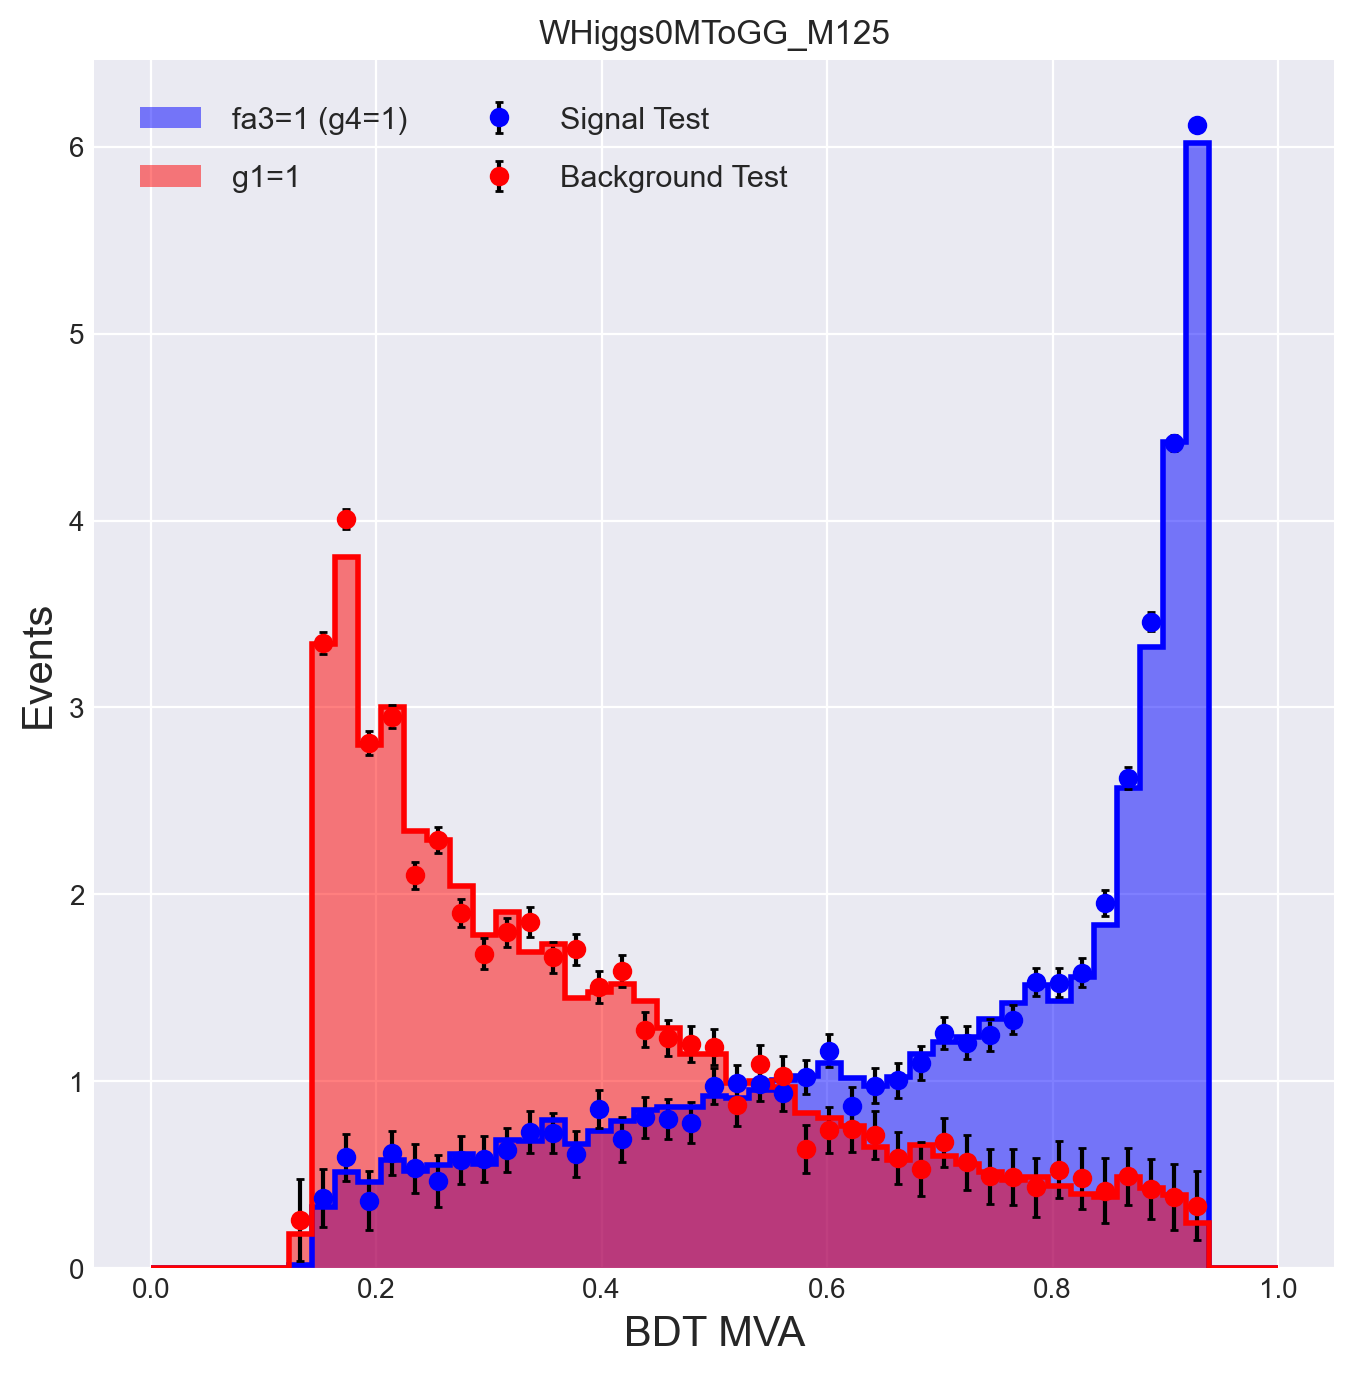

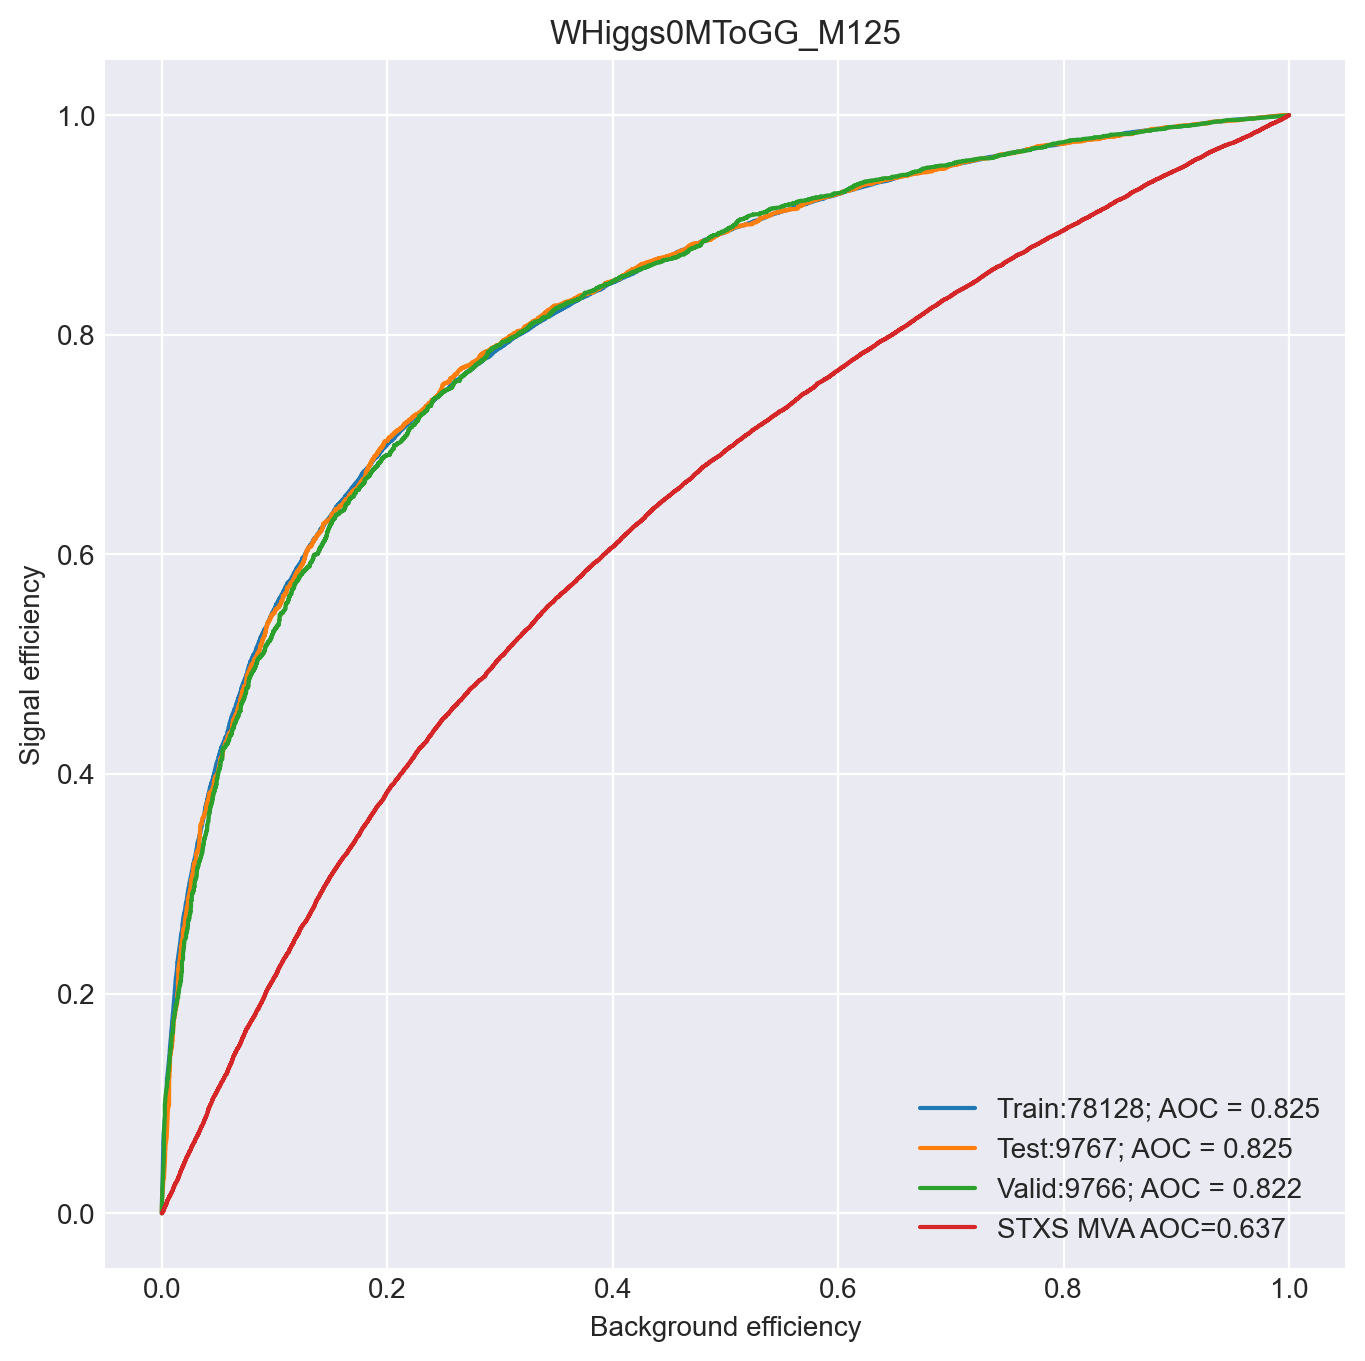

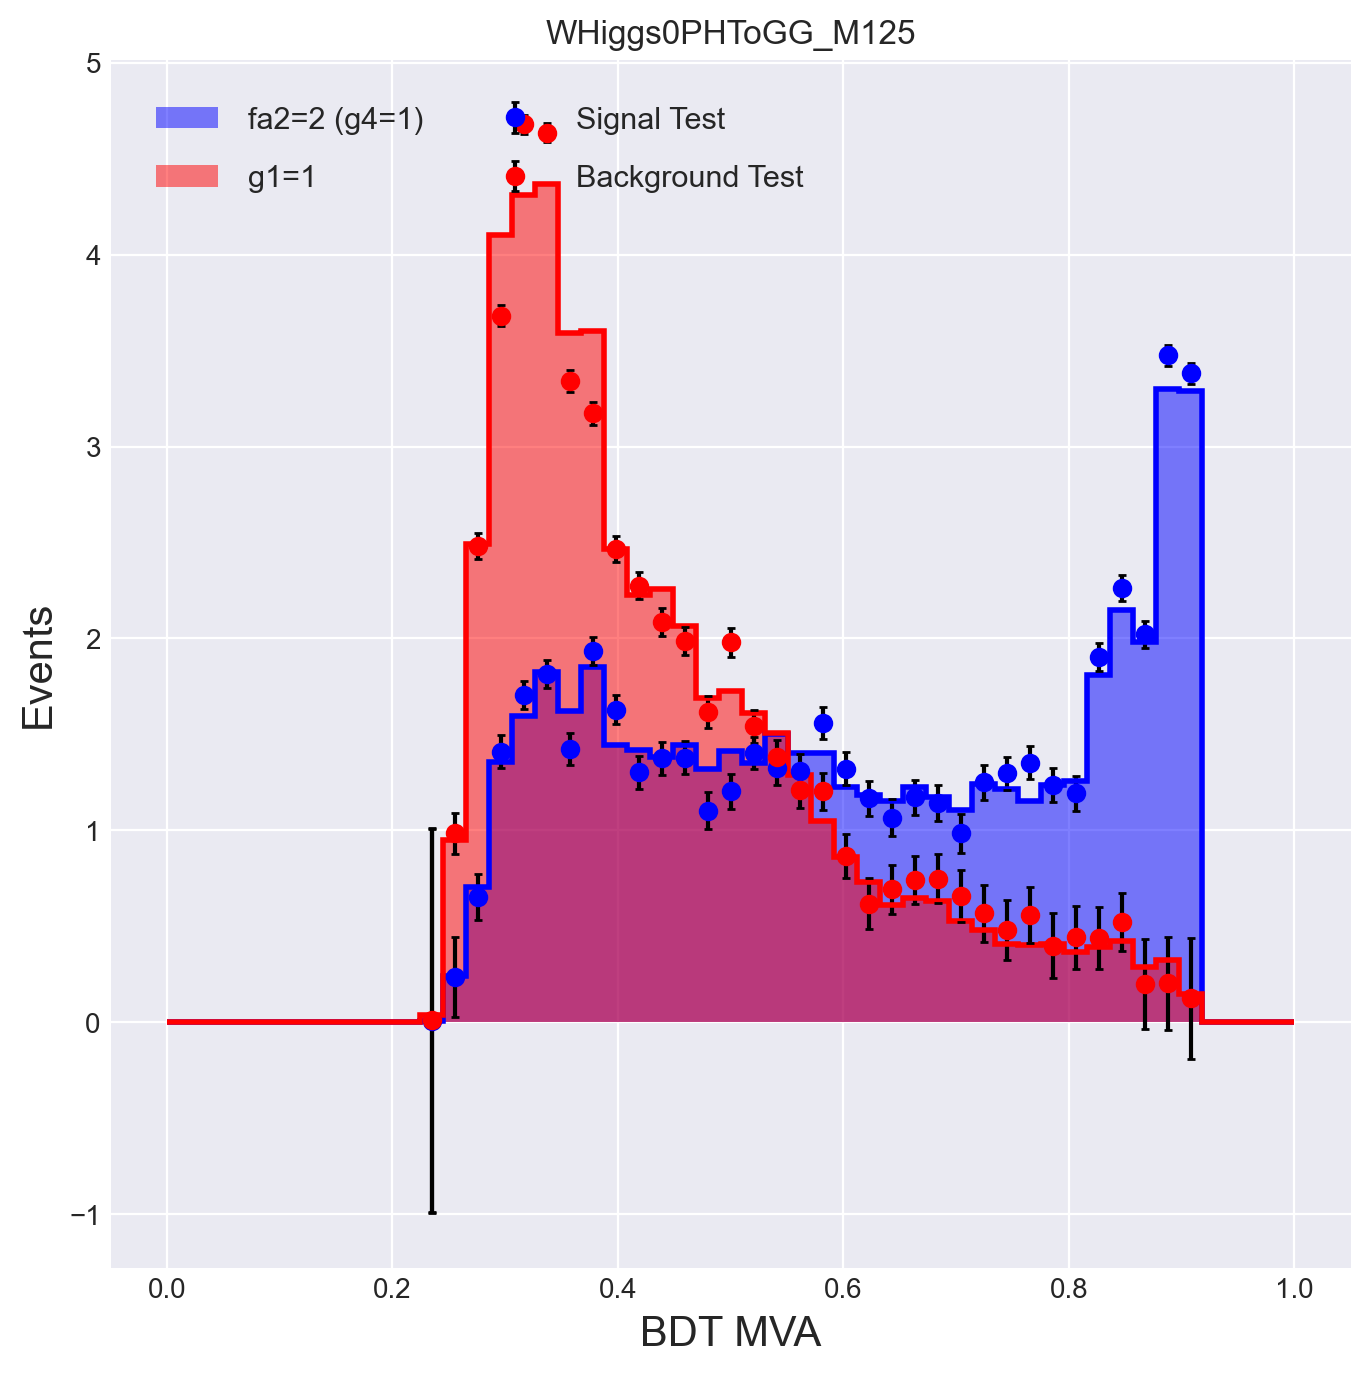

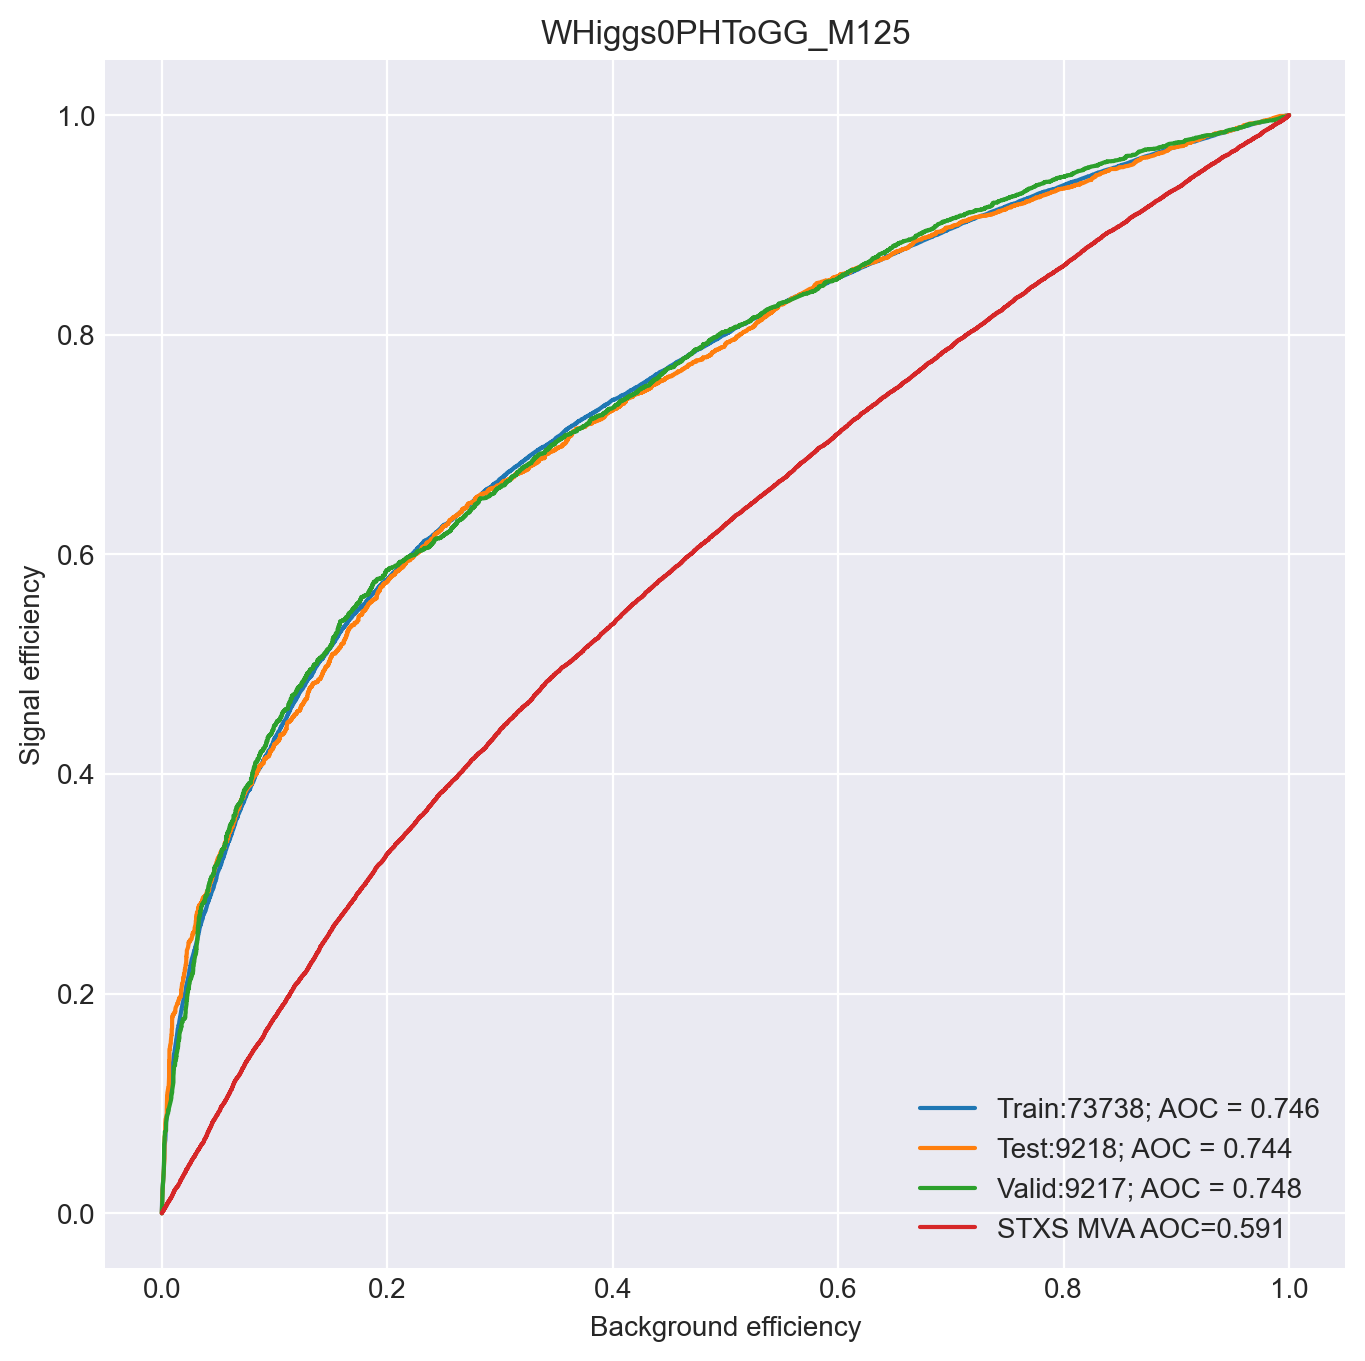

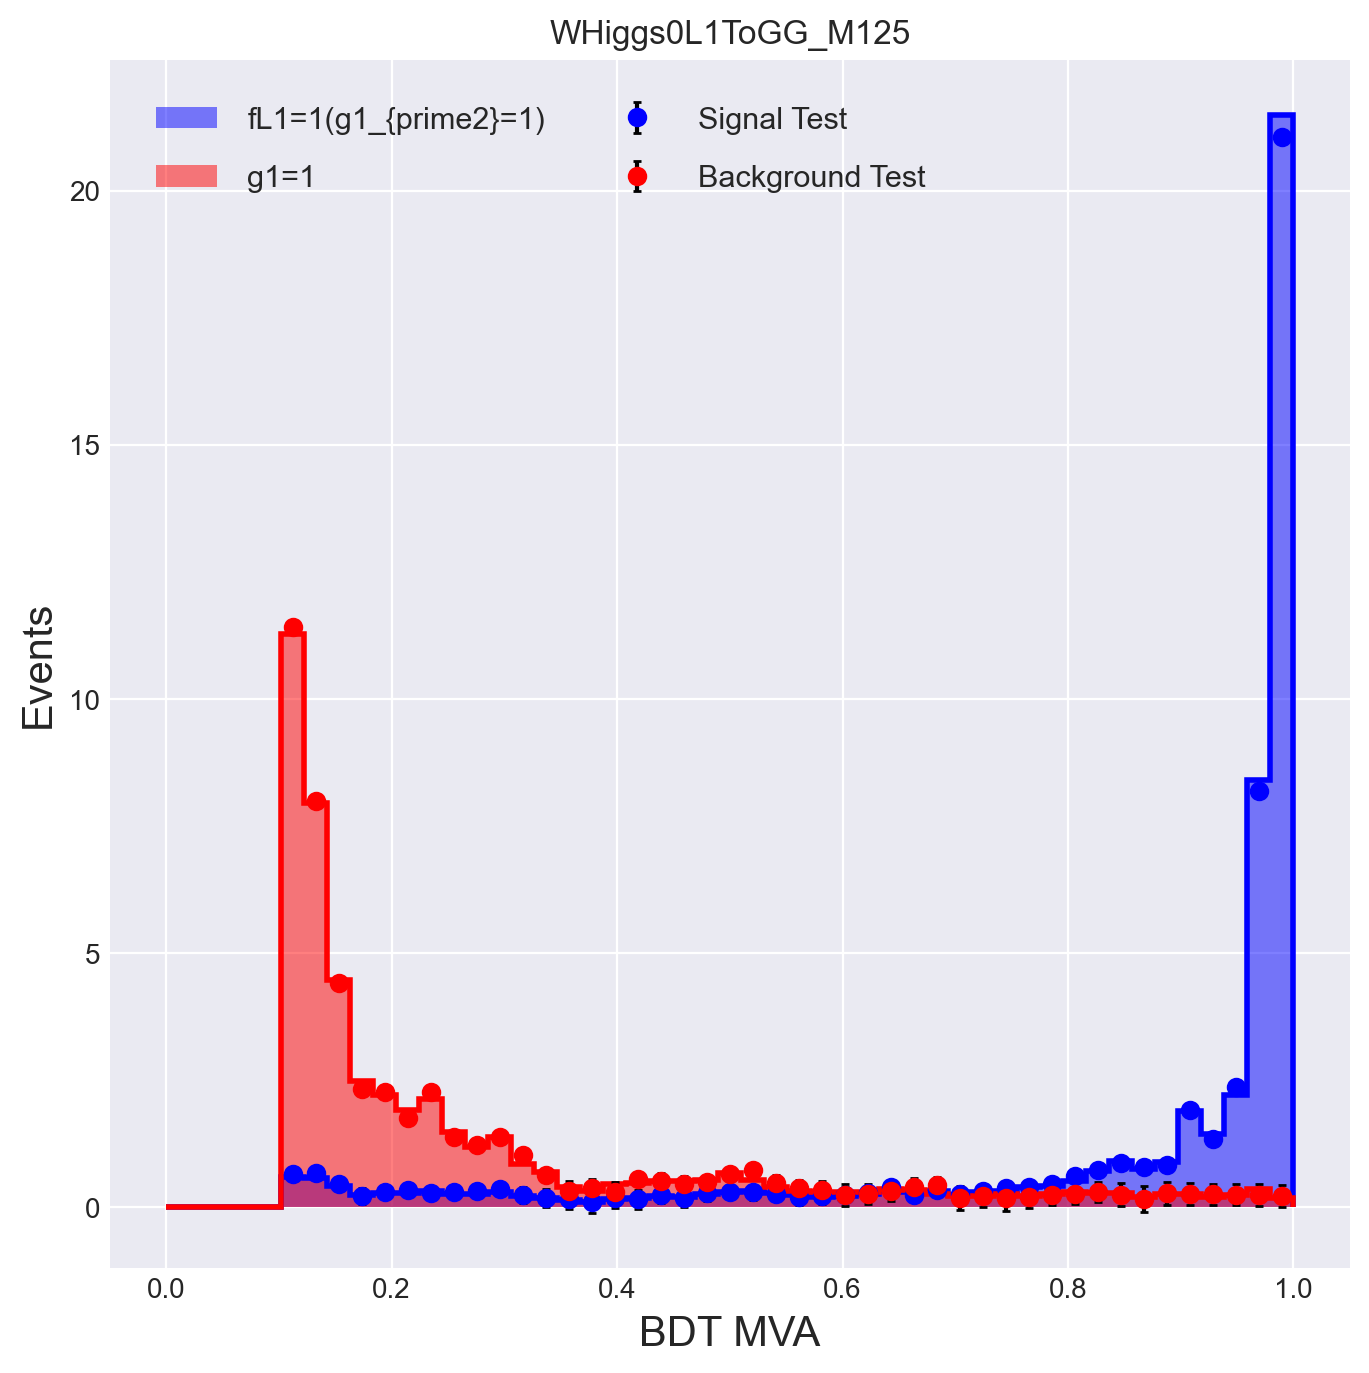

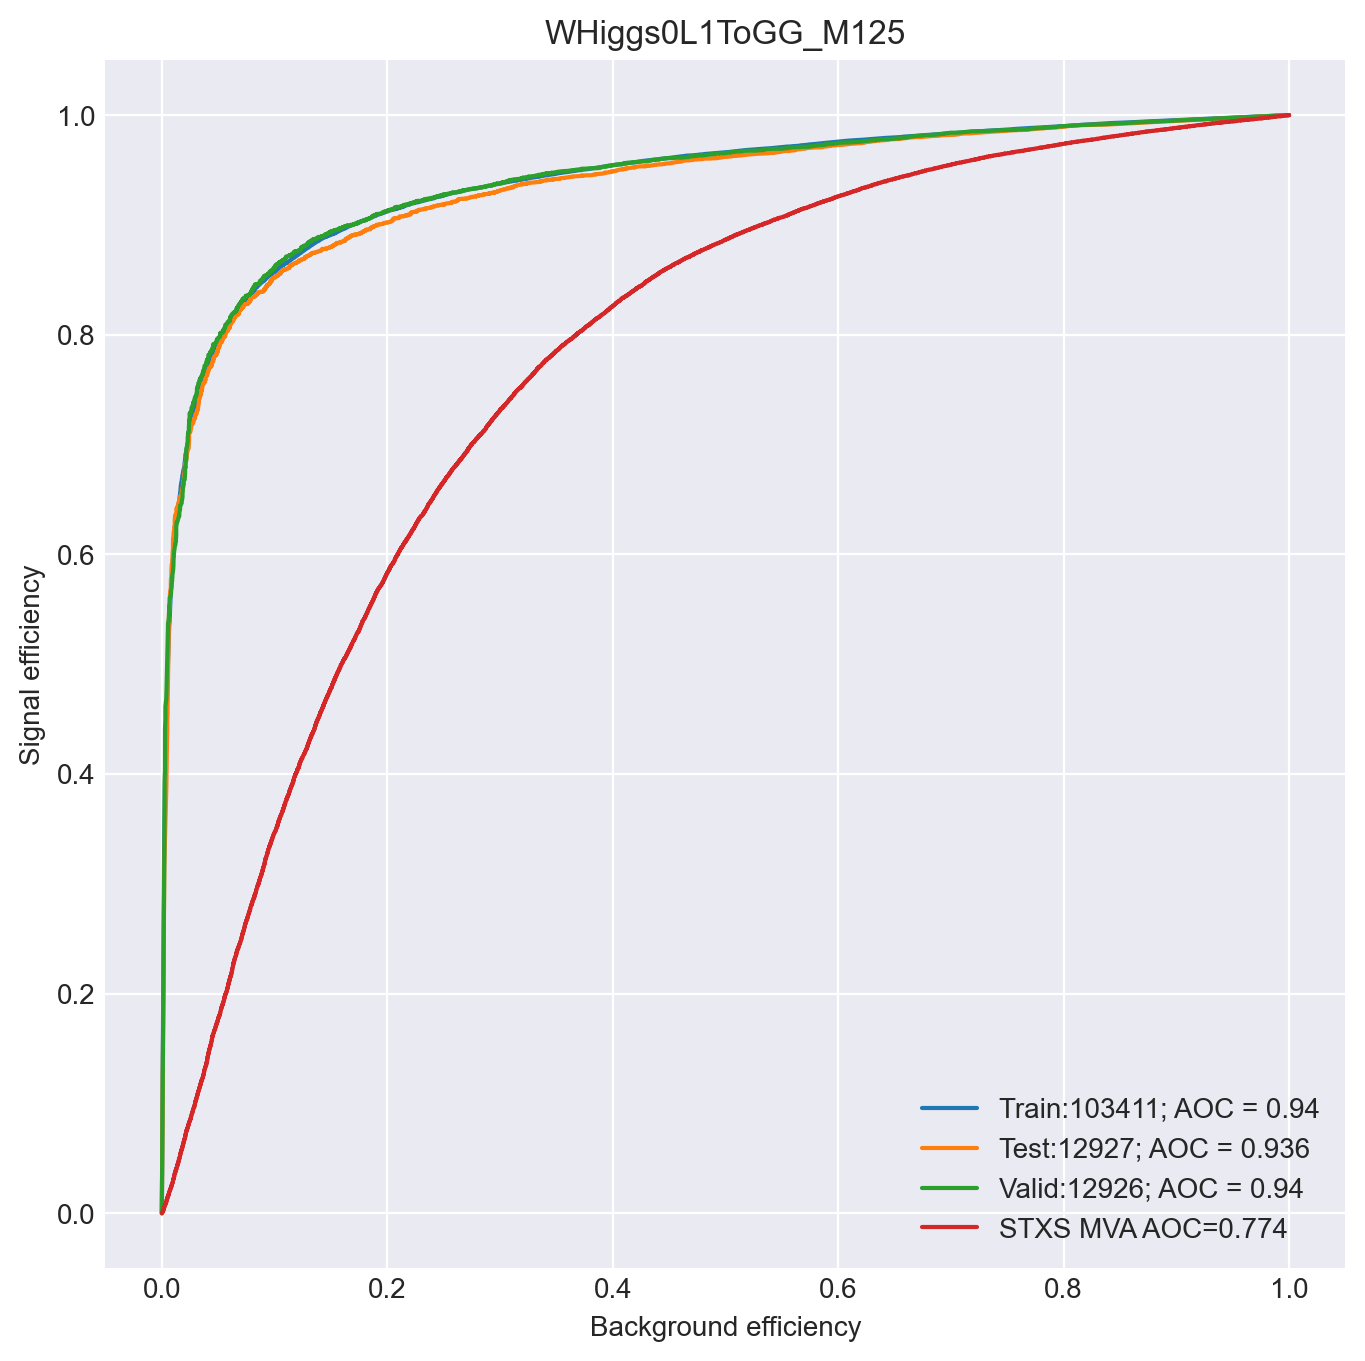

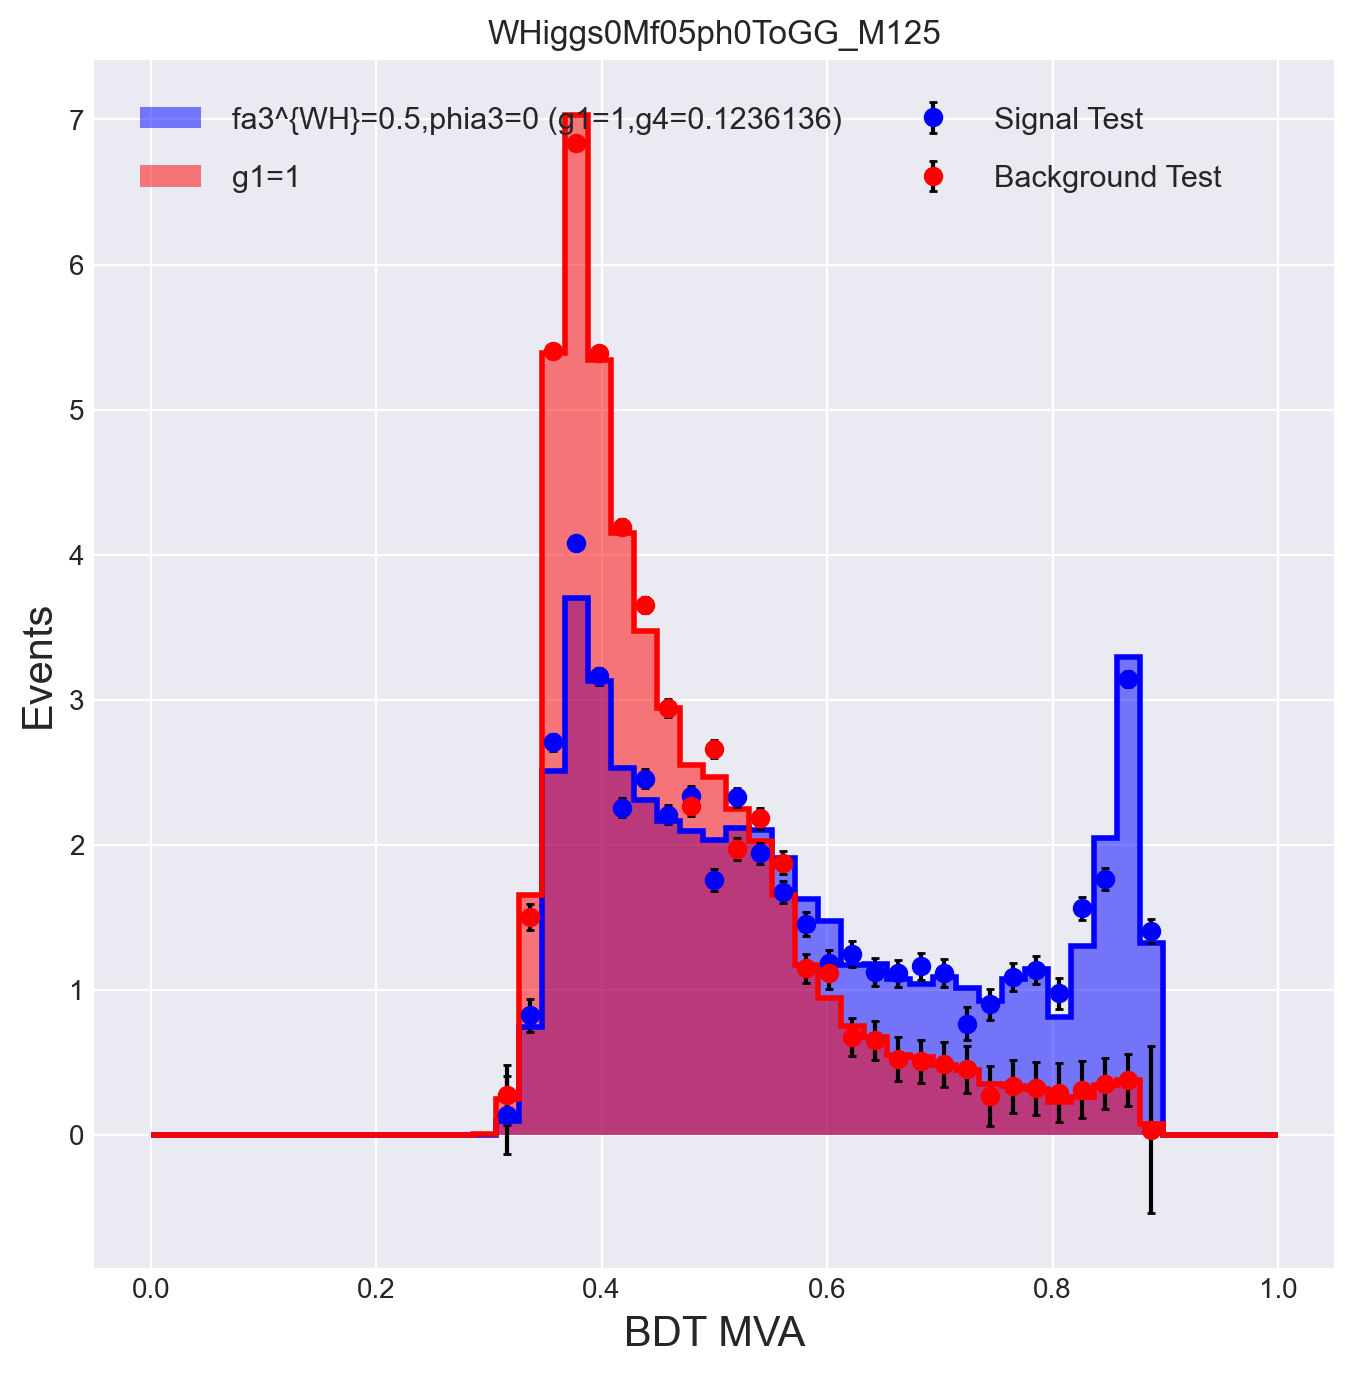

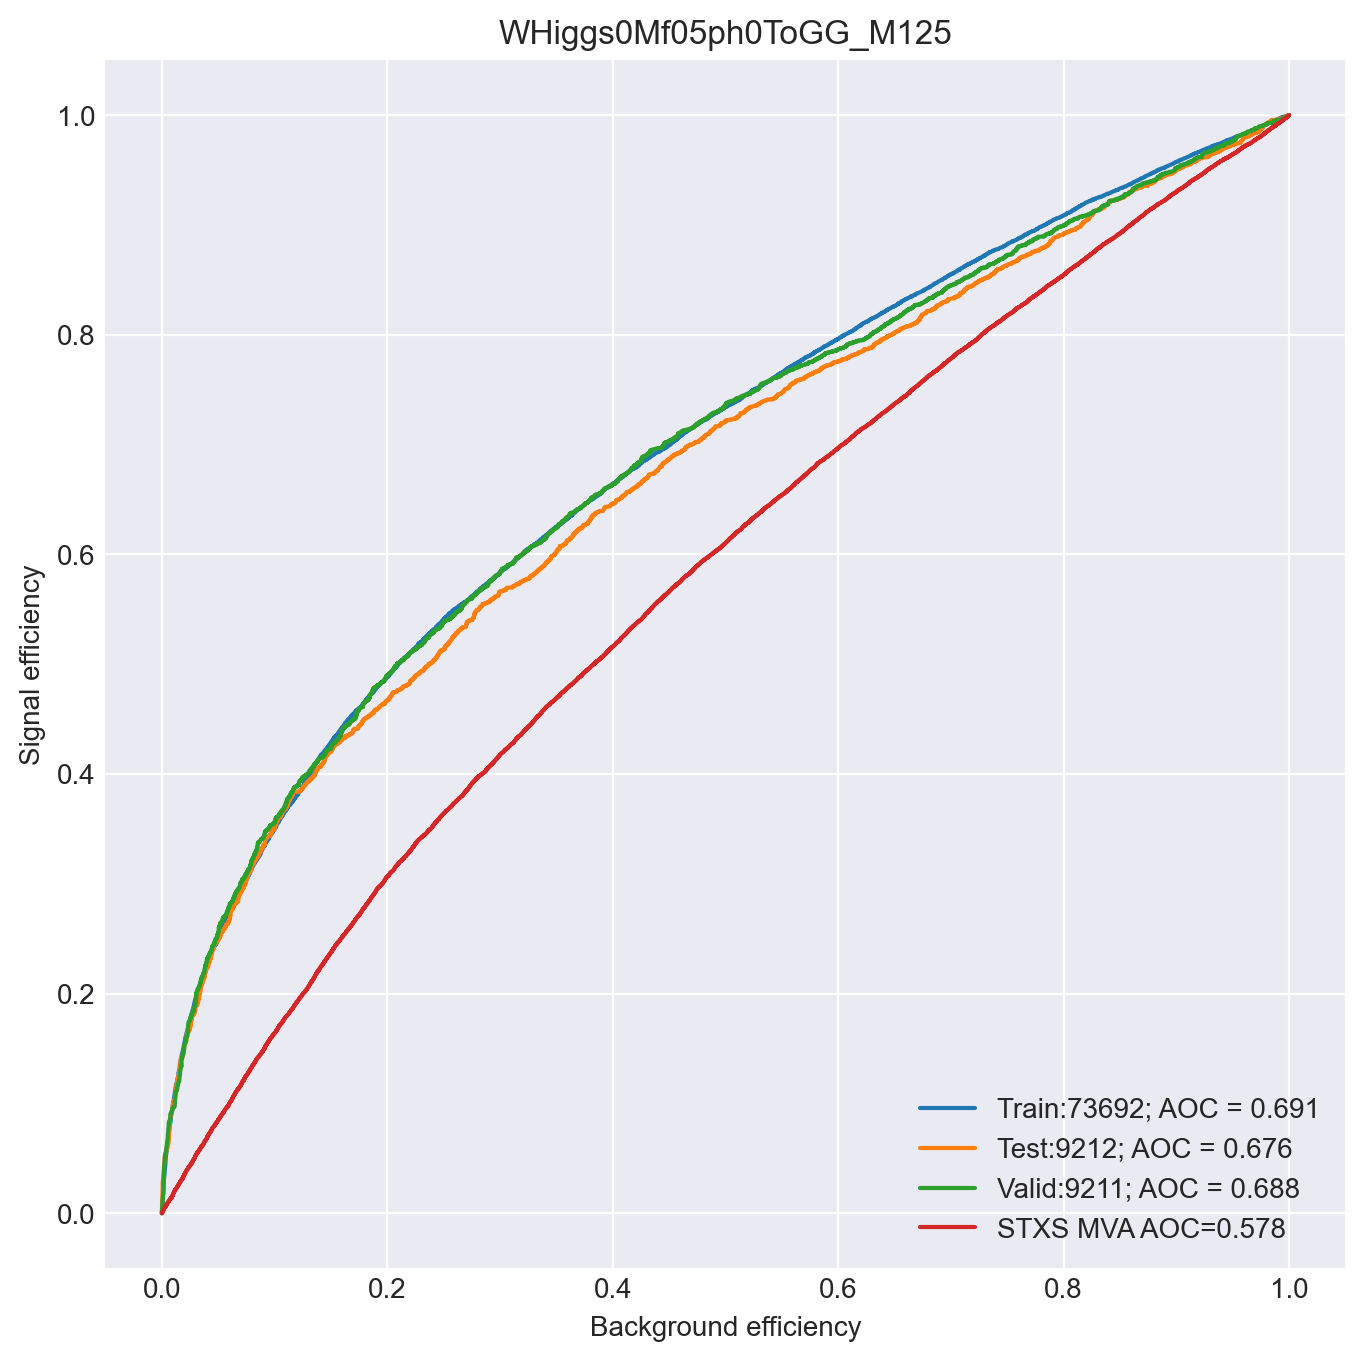

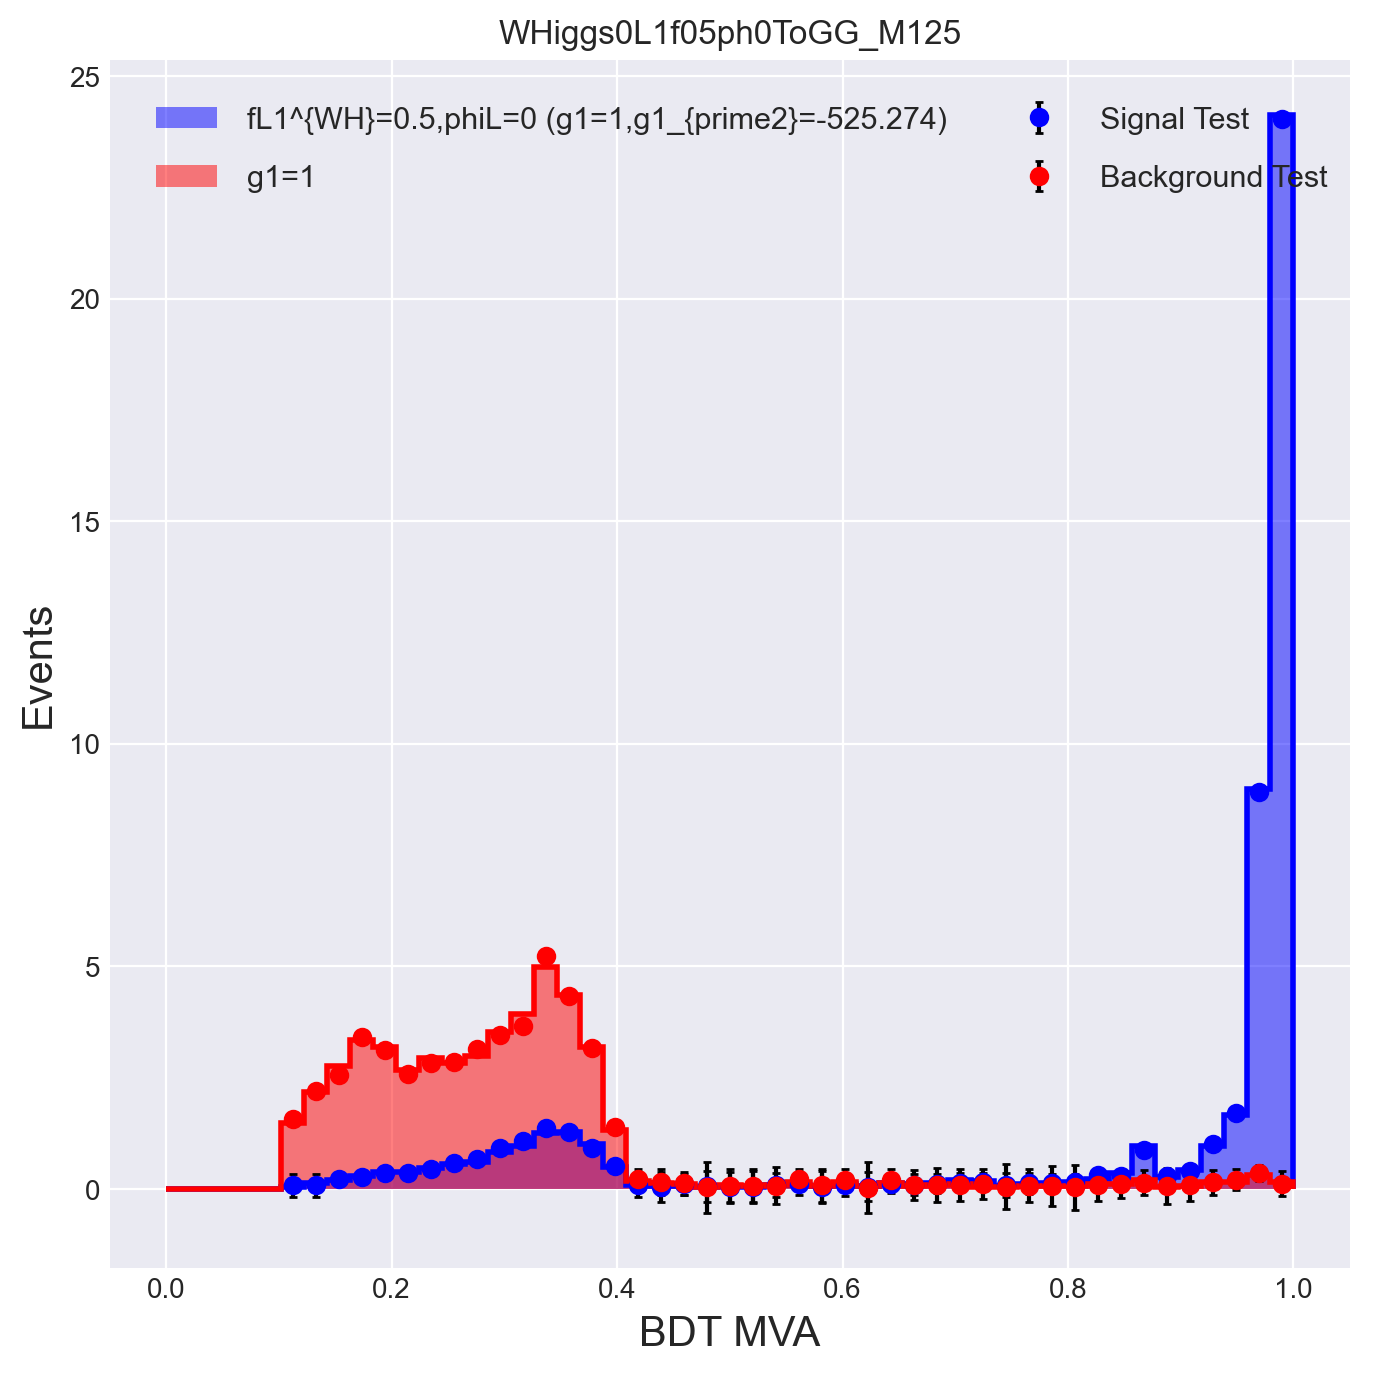

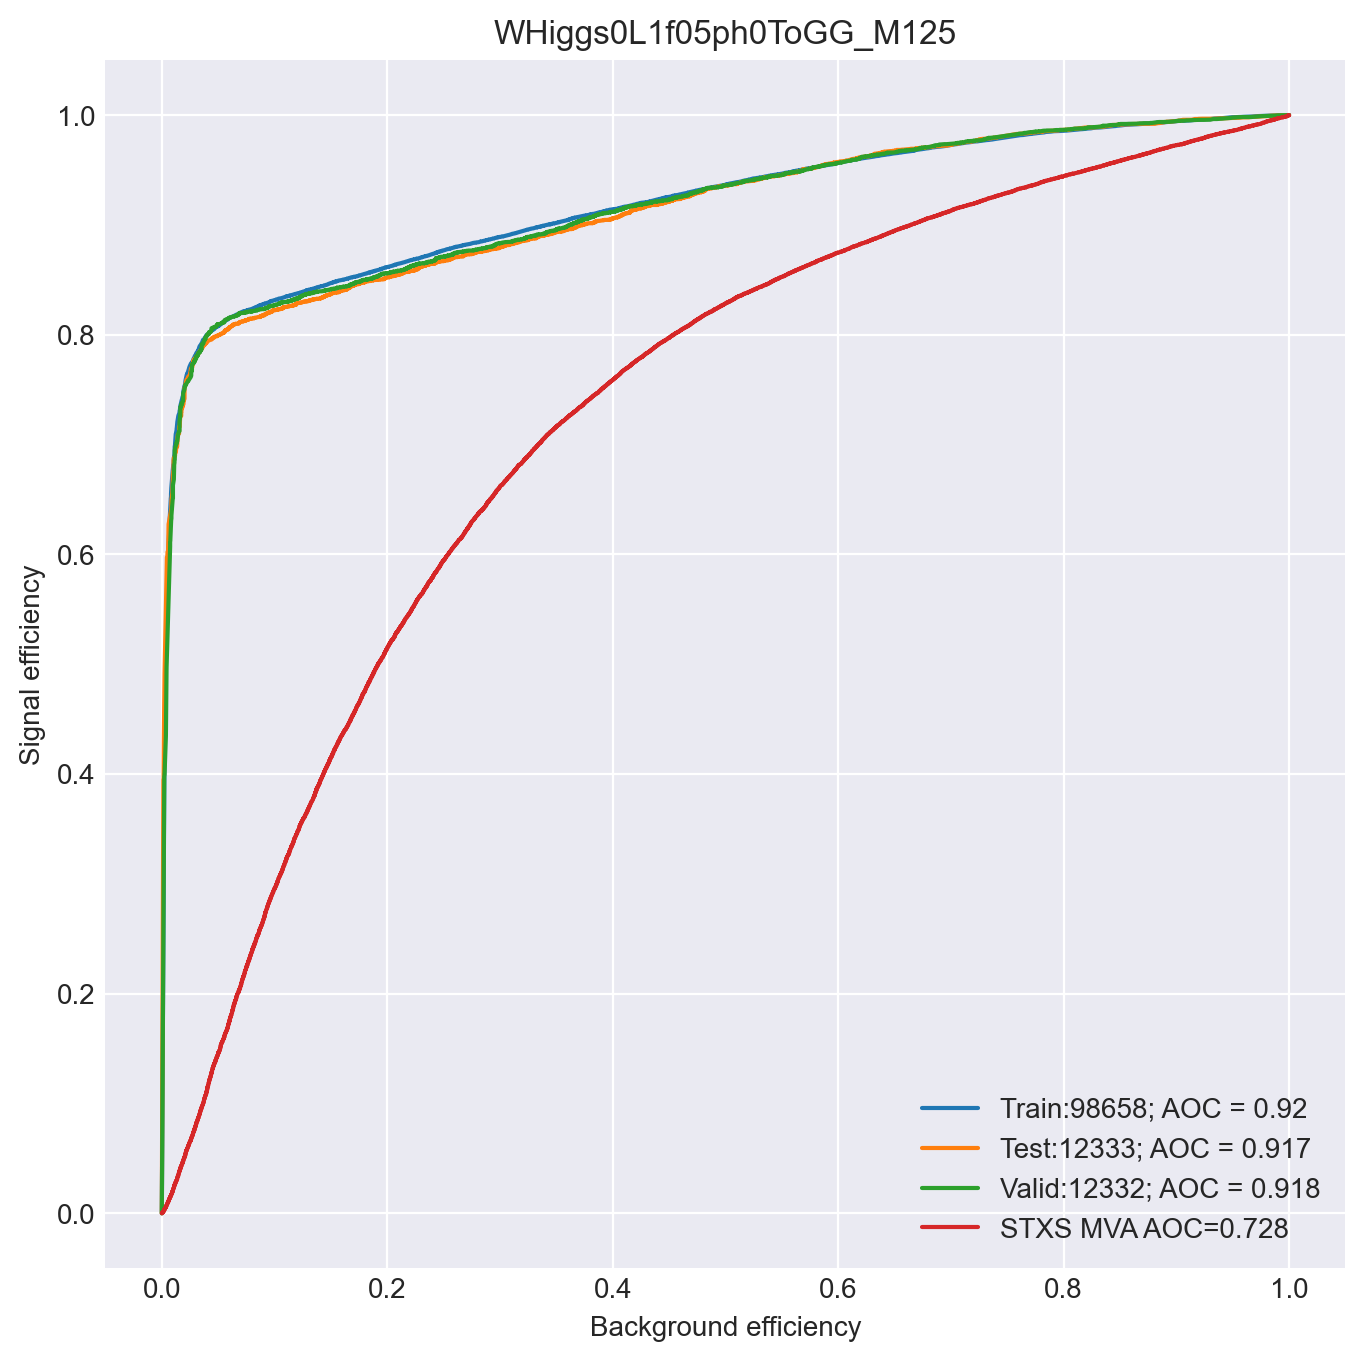

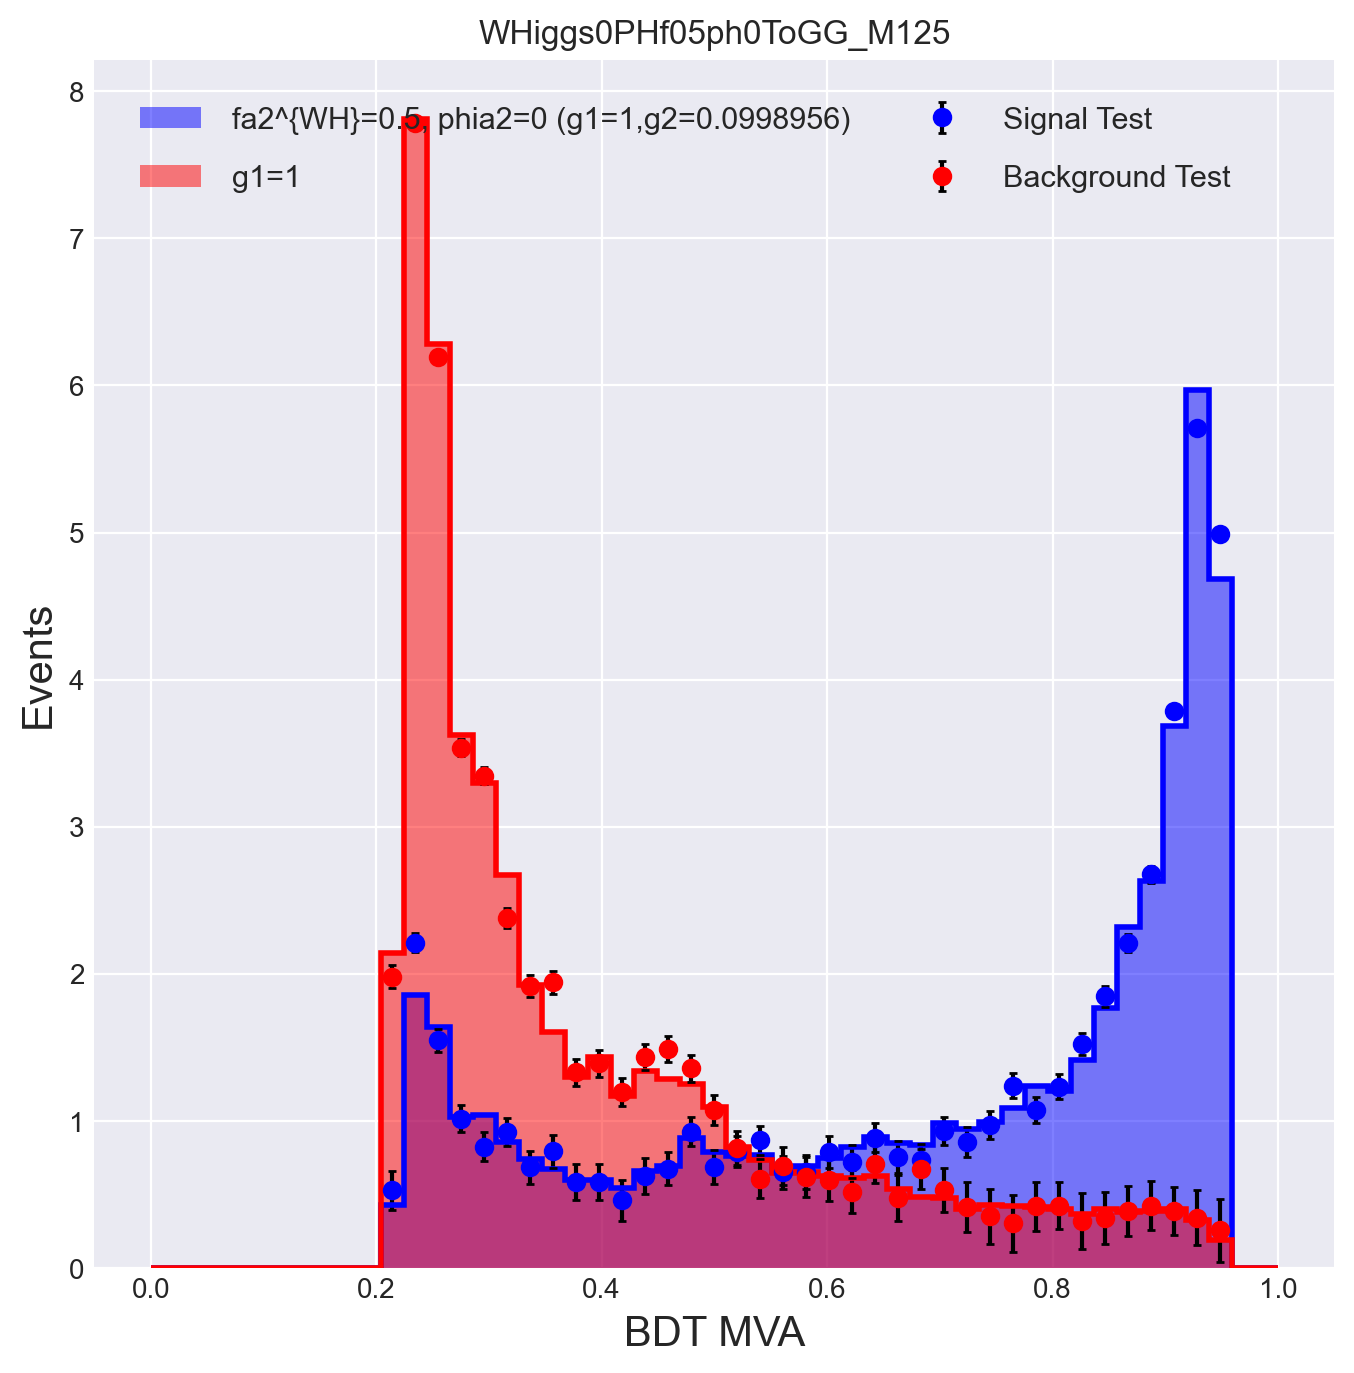

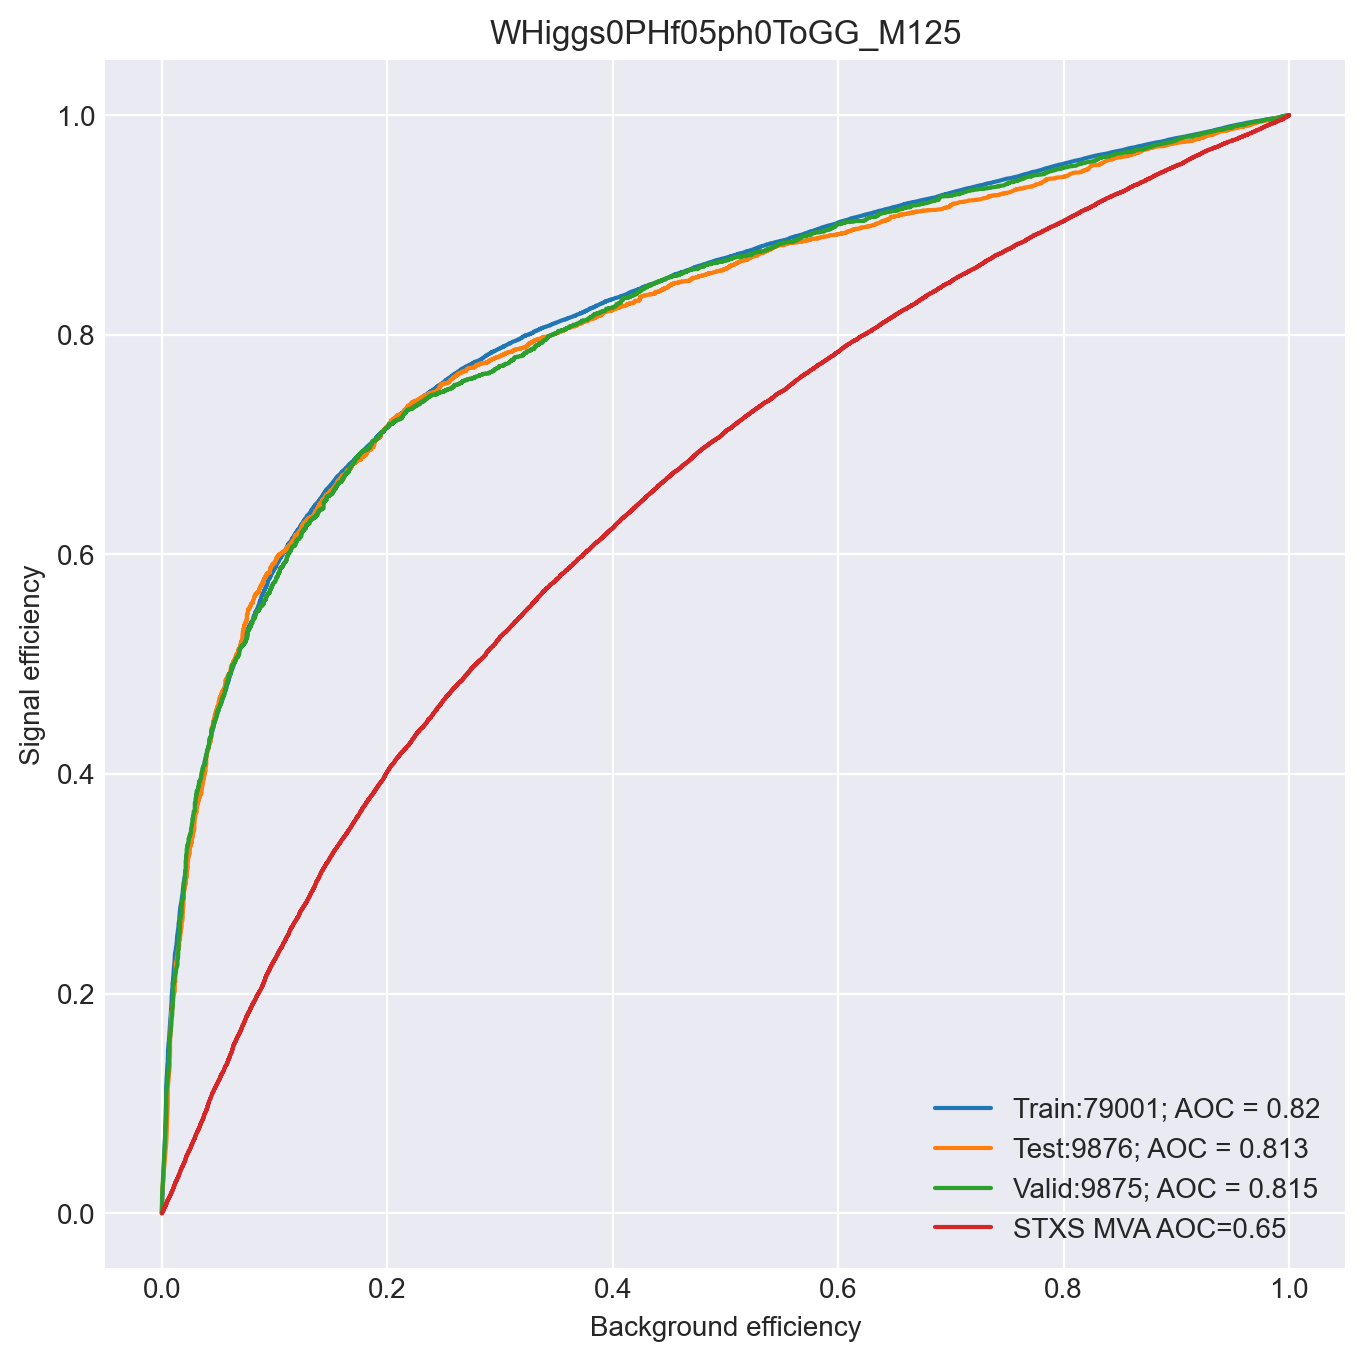

In [8]:
bdt_params = {
    'eval_metric': 'auc',
    'learning_rate': 0.5,
    'max_depth': 14,
    'objective': 'binary:logistic',
}
WH_bdt_dict = {}

for sig in WHsig_list:
#     folder_name = f'anom_models/2021_11_02/{sig}_model.xml'
    WH_bdt_dict[sig] = train_bdt(
                       data = dataset_anom_WH['wh']
                      ,signal      = [sig]
                      ,background  = WHbackground
                      ,queryString = queryString
                      ,bdt_vars    = bdt_vars
                      ,params      = bdt_params
#                       ,prune       = True #remove this entire line to stop using pruning
    )
    WH_bdt_dict[sig].train()
    WH_bdt_dict[sig].AUC(quite=False)
    WH_bdt_dict[sig].MVA_plt(AMS=False)
    WH_bdt_dict[sig].ROC()
    WH_bdt_dict[sig].save_tmva_xml(f"saved_models/{sig}.xml")
#     break

ZHiggs0PHf05ph0ToGG_M125
Default training performance:
area under roc curve for training set = 0.805
area under roc curve for test set     = 0.797
area under roc curve for validity set     = 0.819
area under roc curve for STXS MVA     = 0.564
ZHiggs0L1f05ph0ToGG_M125
Default training performance:
area under roc curve for training set = 0.895
area under roc curve for test set     = 0.903
area under roc curve for validity set     = 0.883
area under roc curve for STXS MVA     = 0.621
ZHiggs0PHToGG_M125
Default training performance:
area under roc curve for training set = 0.729
area under roc curve for test set     = 0.717
area under roc curve for validity set     = 0.725
area under roc curve for STXS MVA     = 0.521
ZHiggs0L1ToGG_M125
Default training performance:
area under roc curve for training set = 0.923
area under roc curve for test set     = 0.914
area under roc curve for validity set     = 0.924
area under roc curve for STXS MVA     = 0.651
ZHiggs0MToGG_M125
Default training perfo

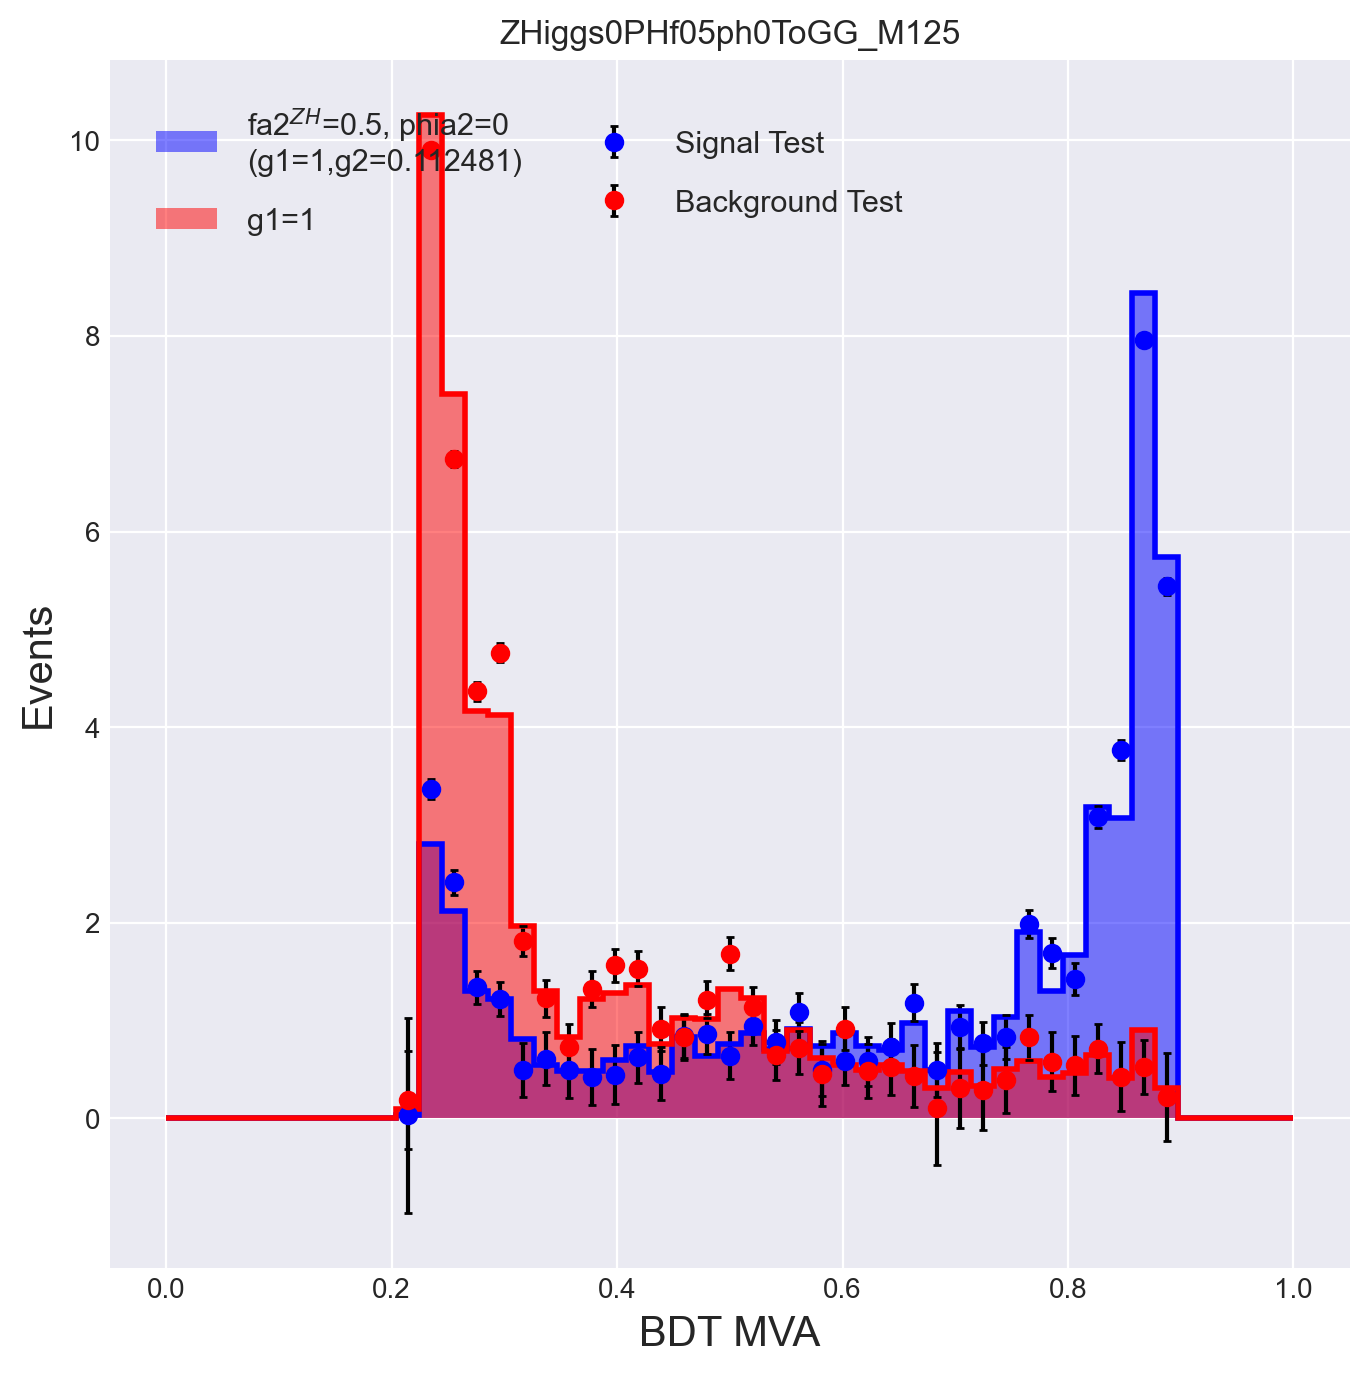

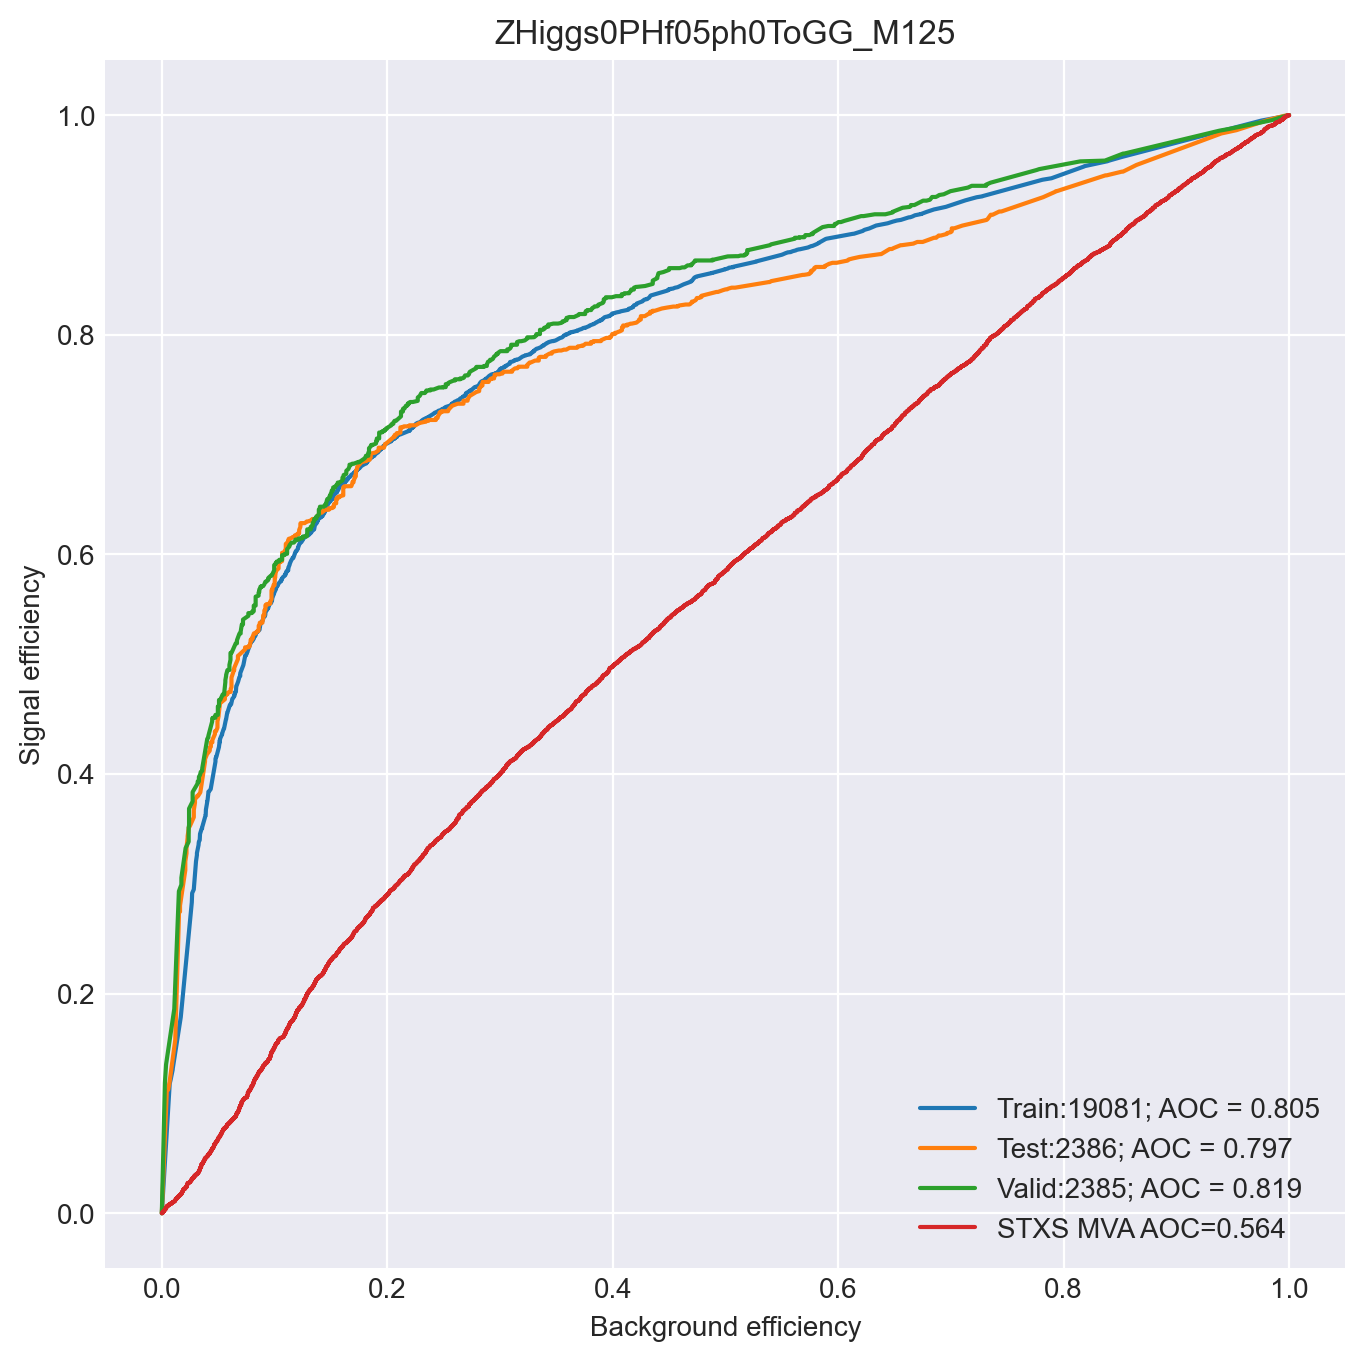

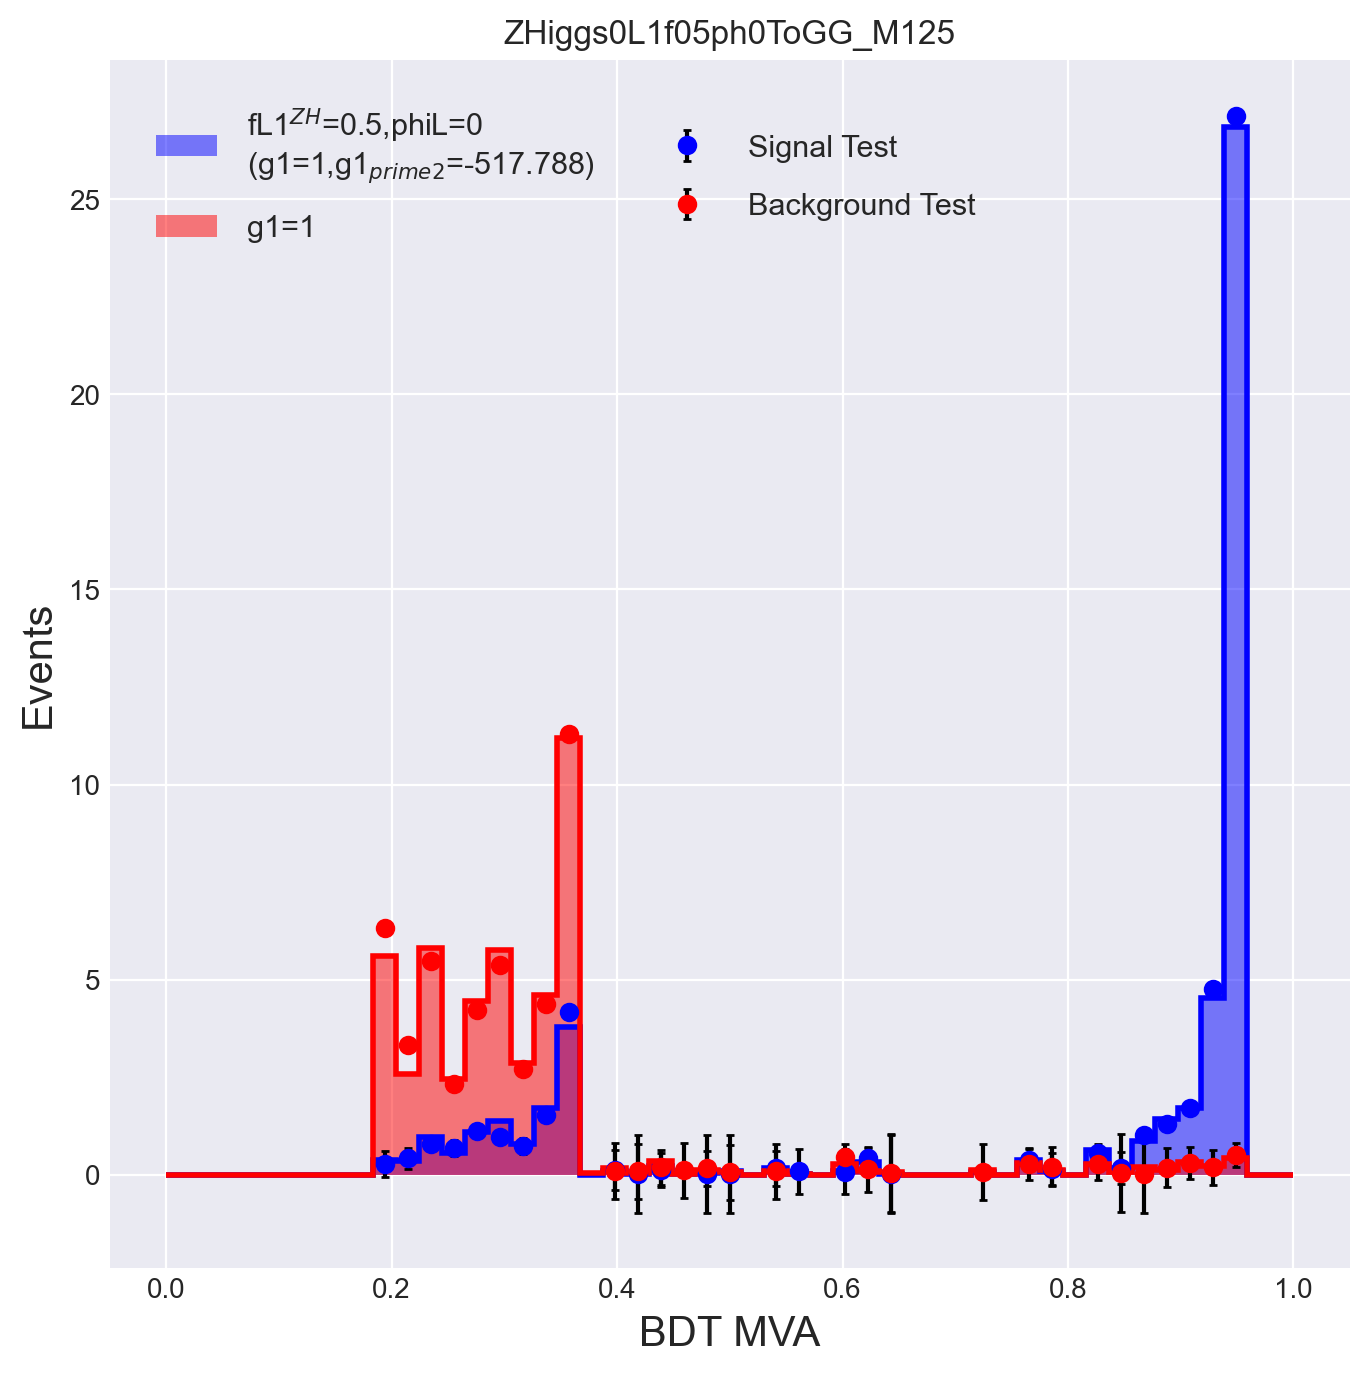

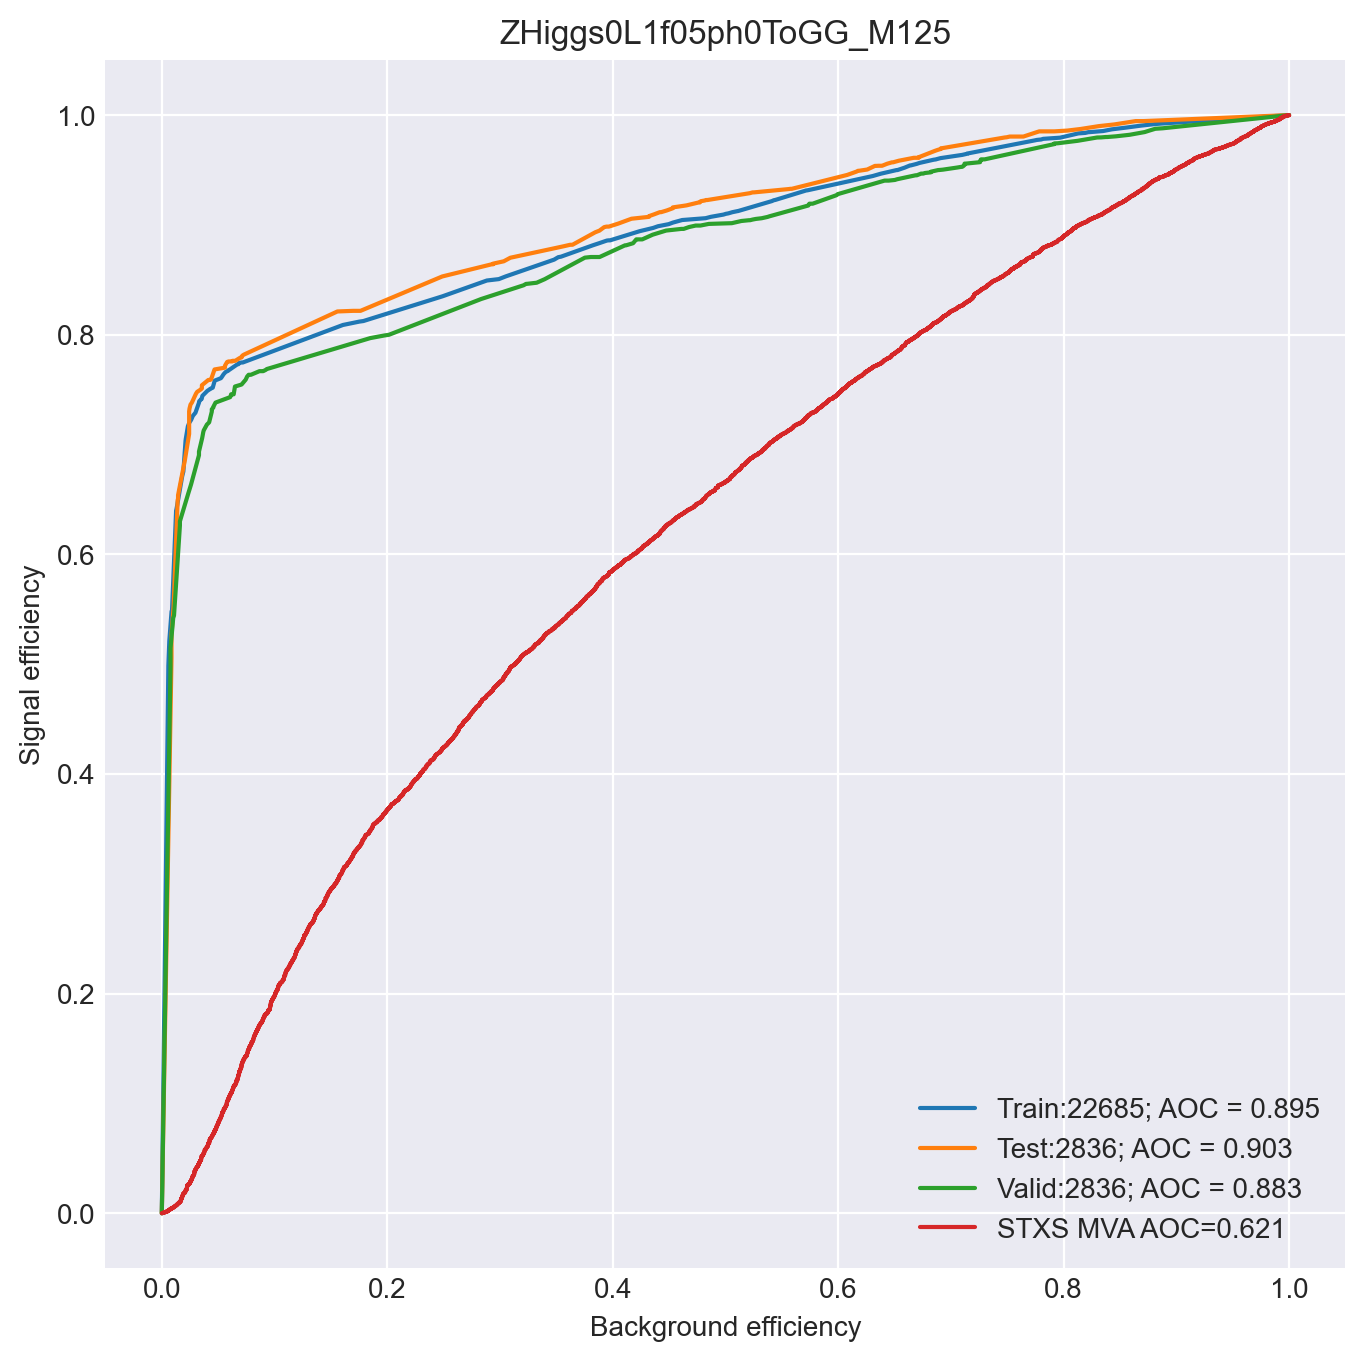

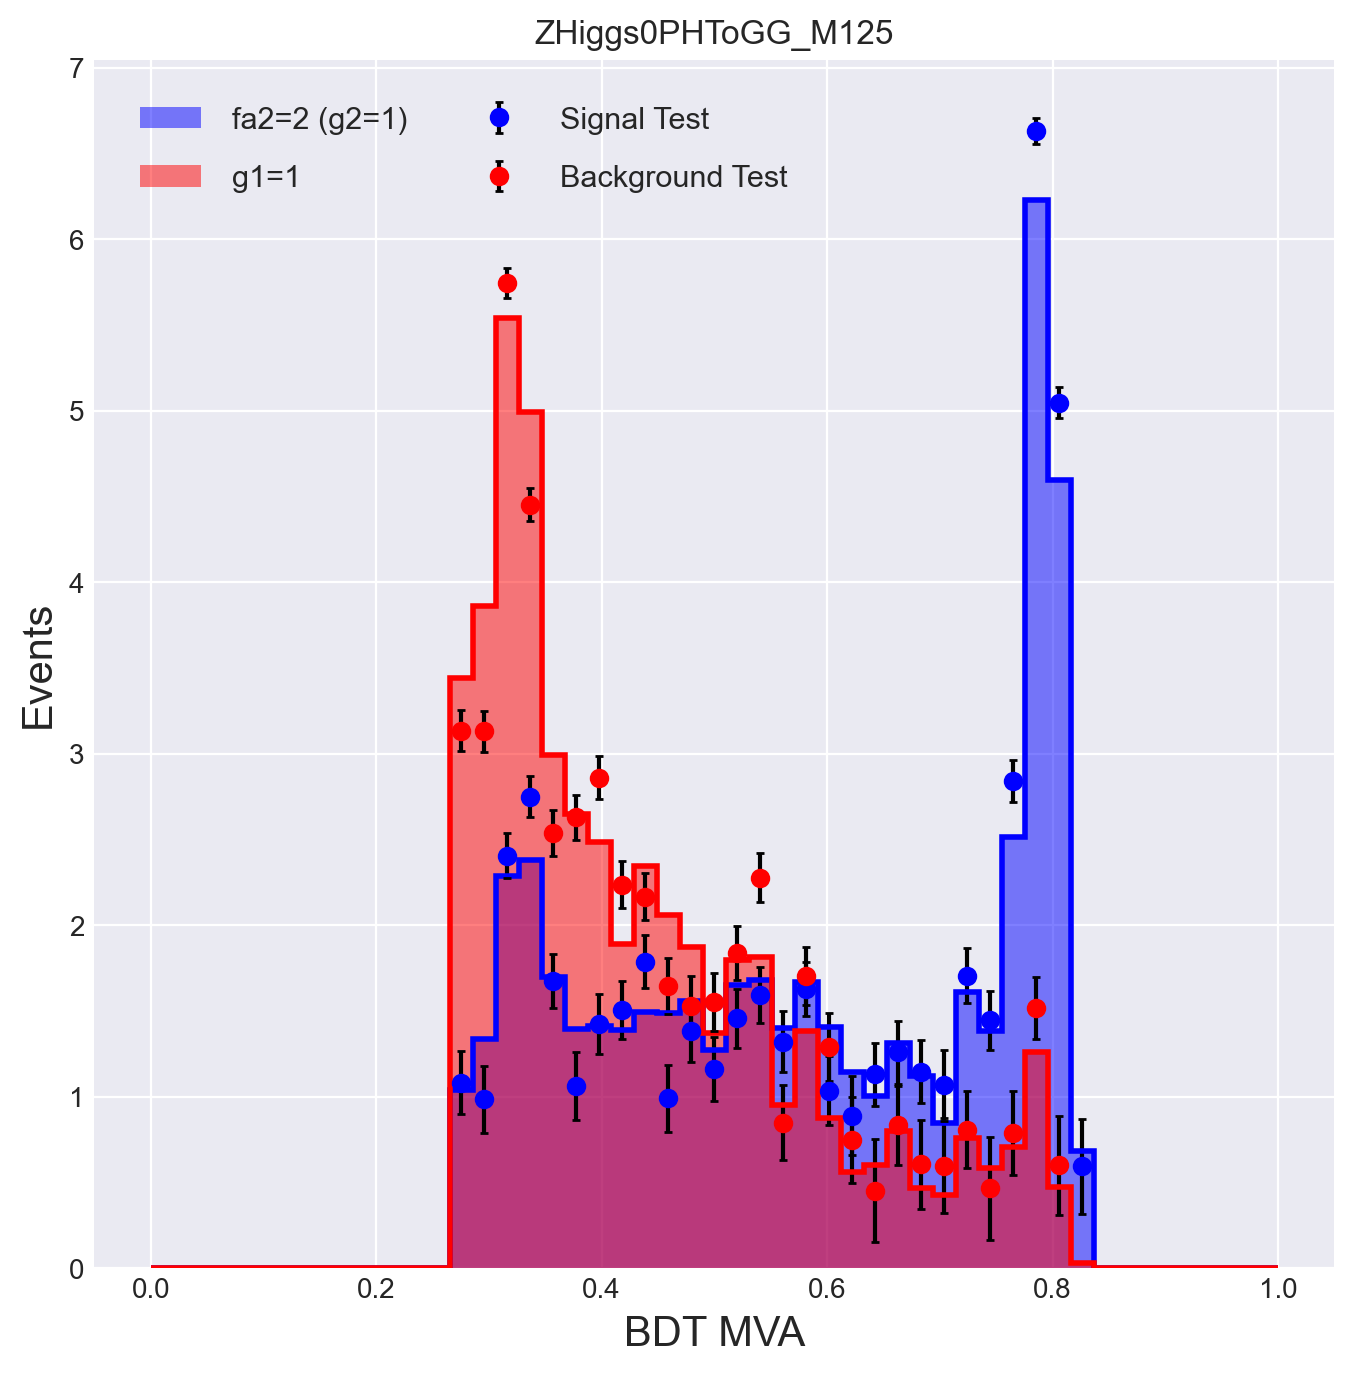

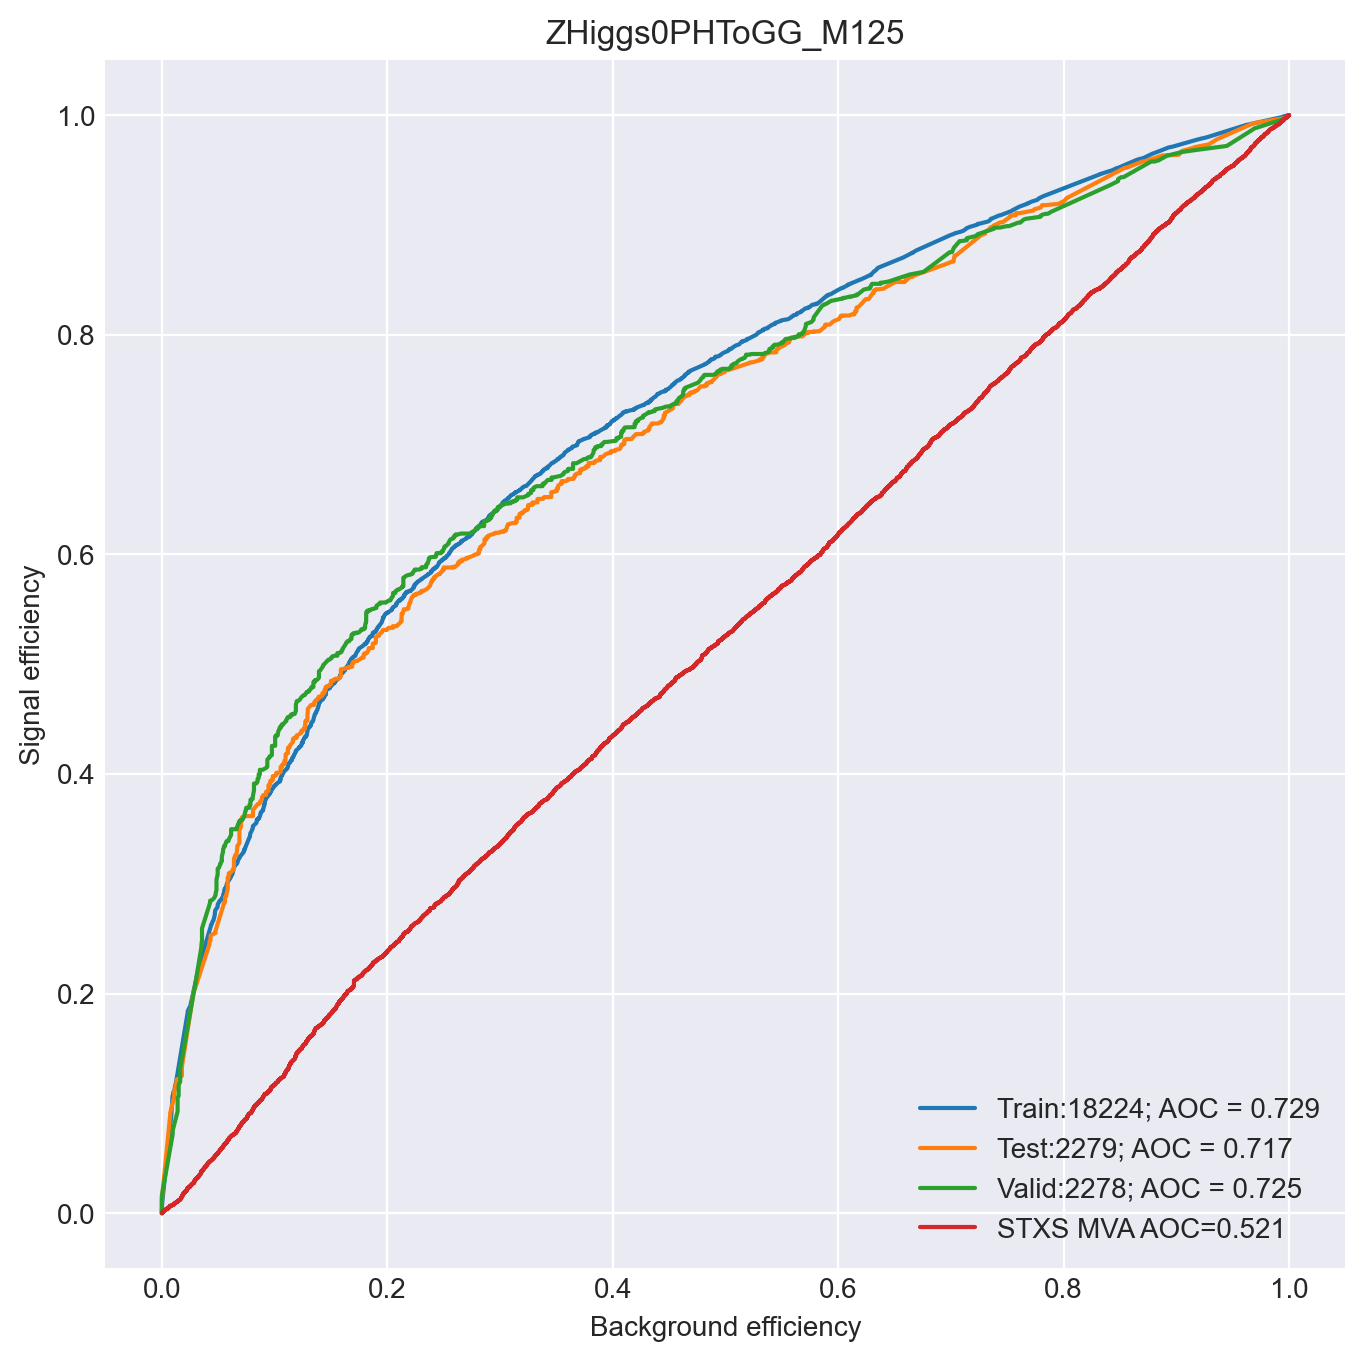

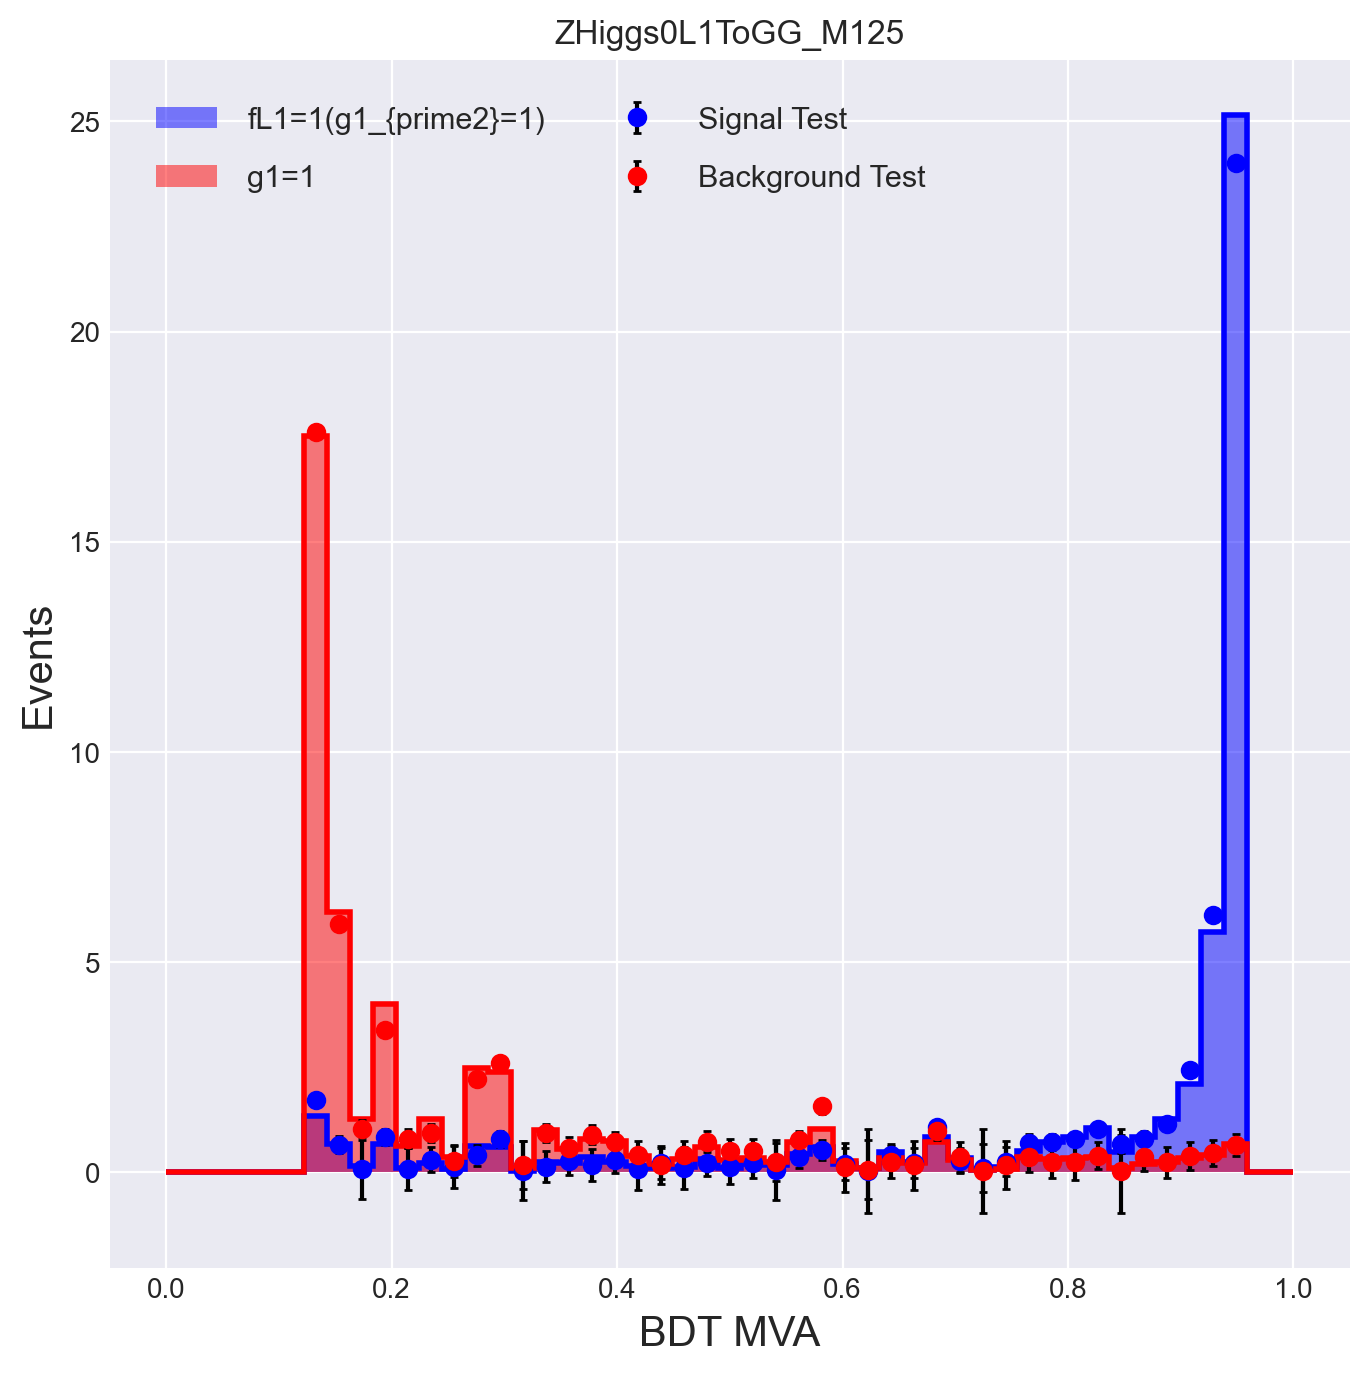

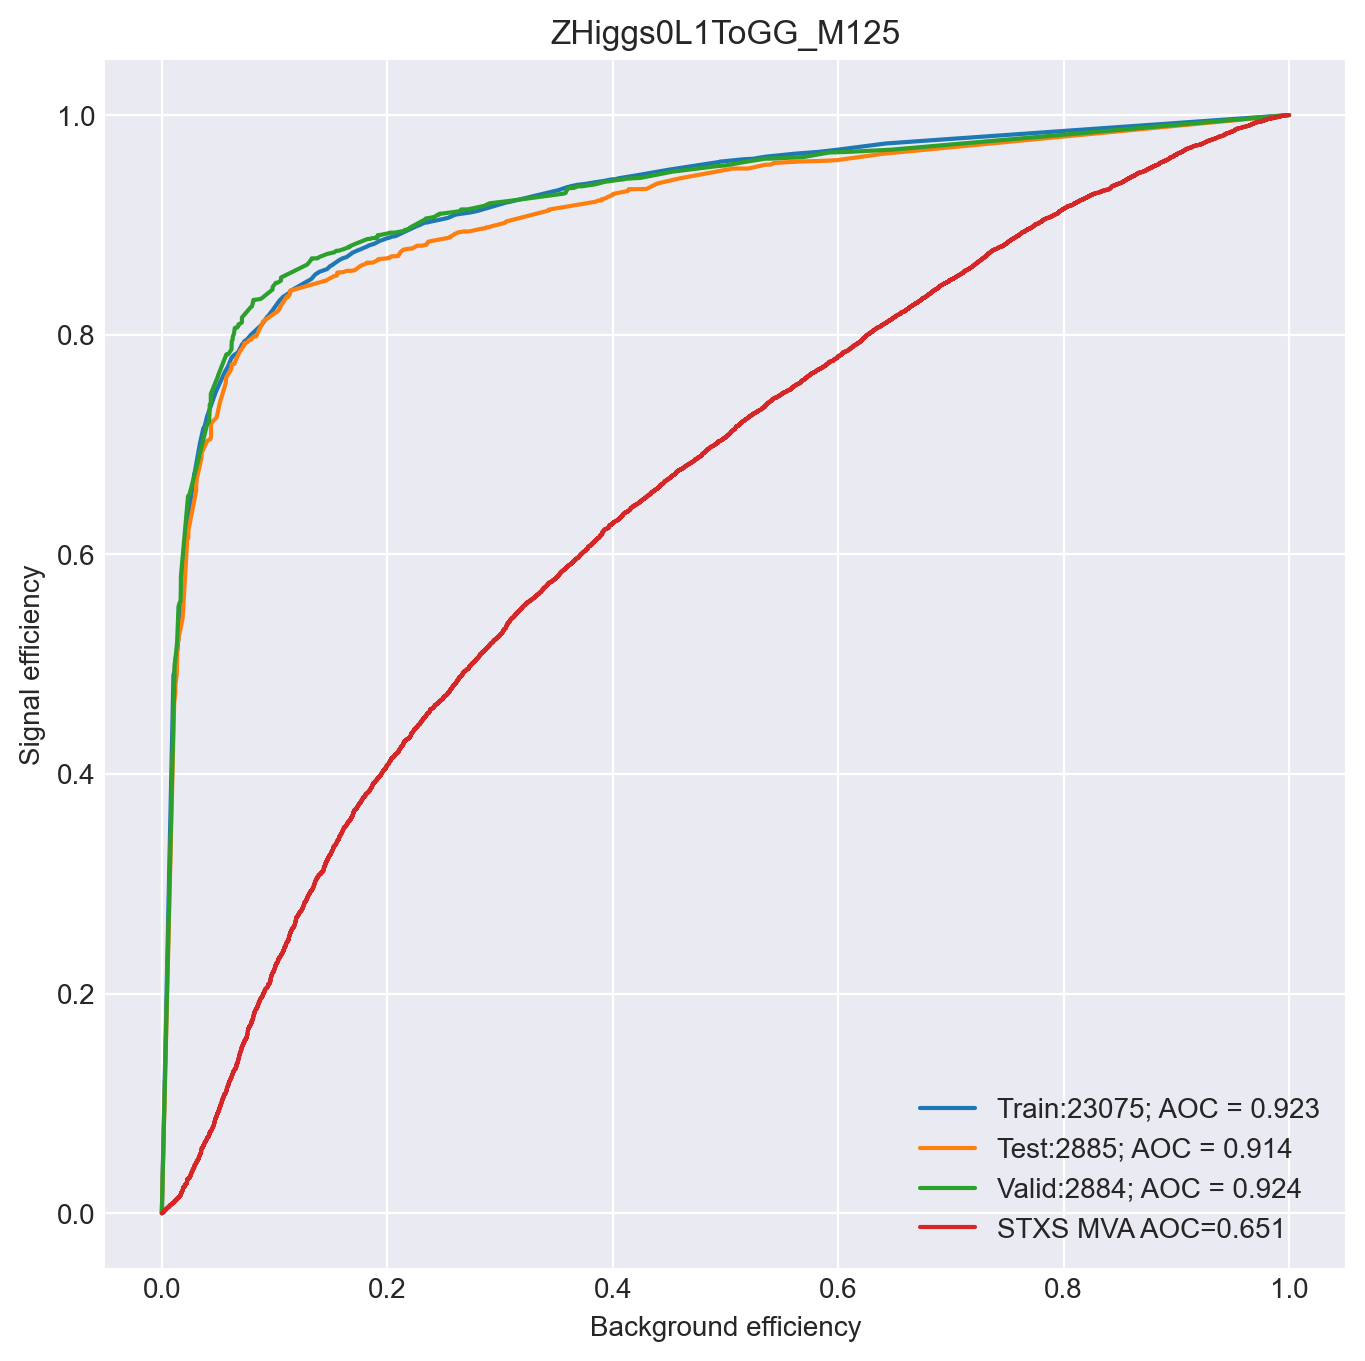

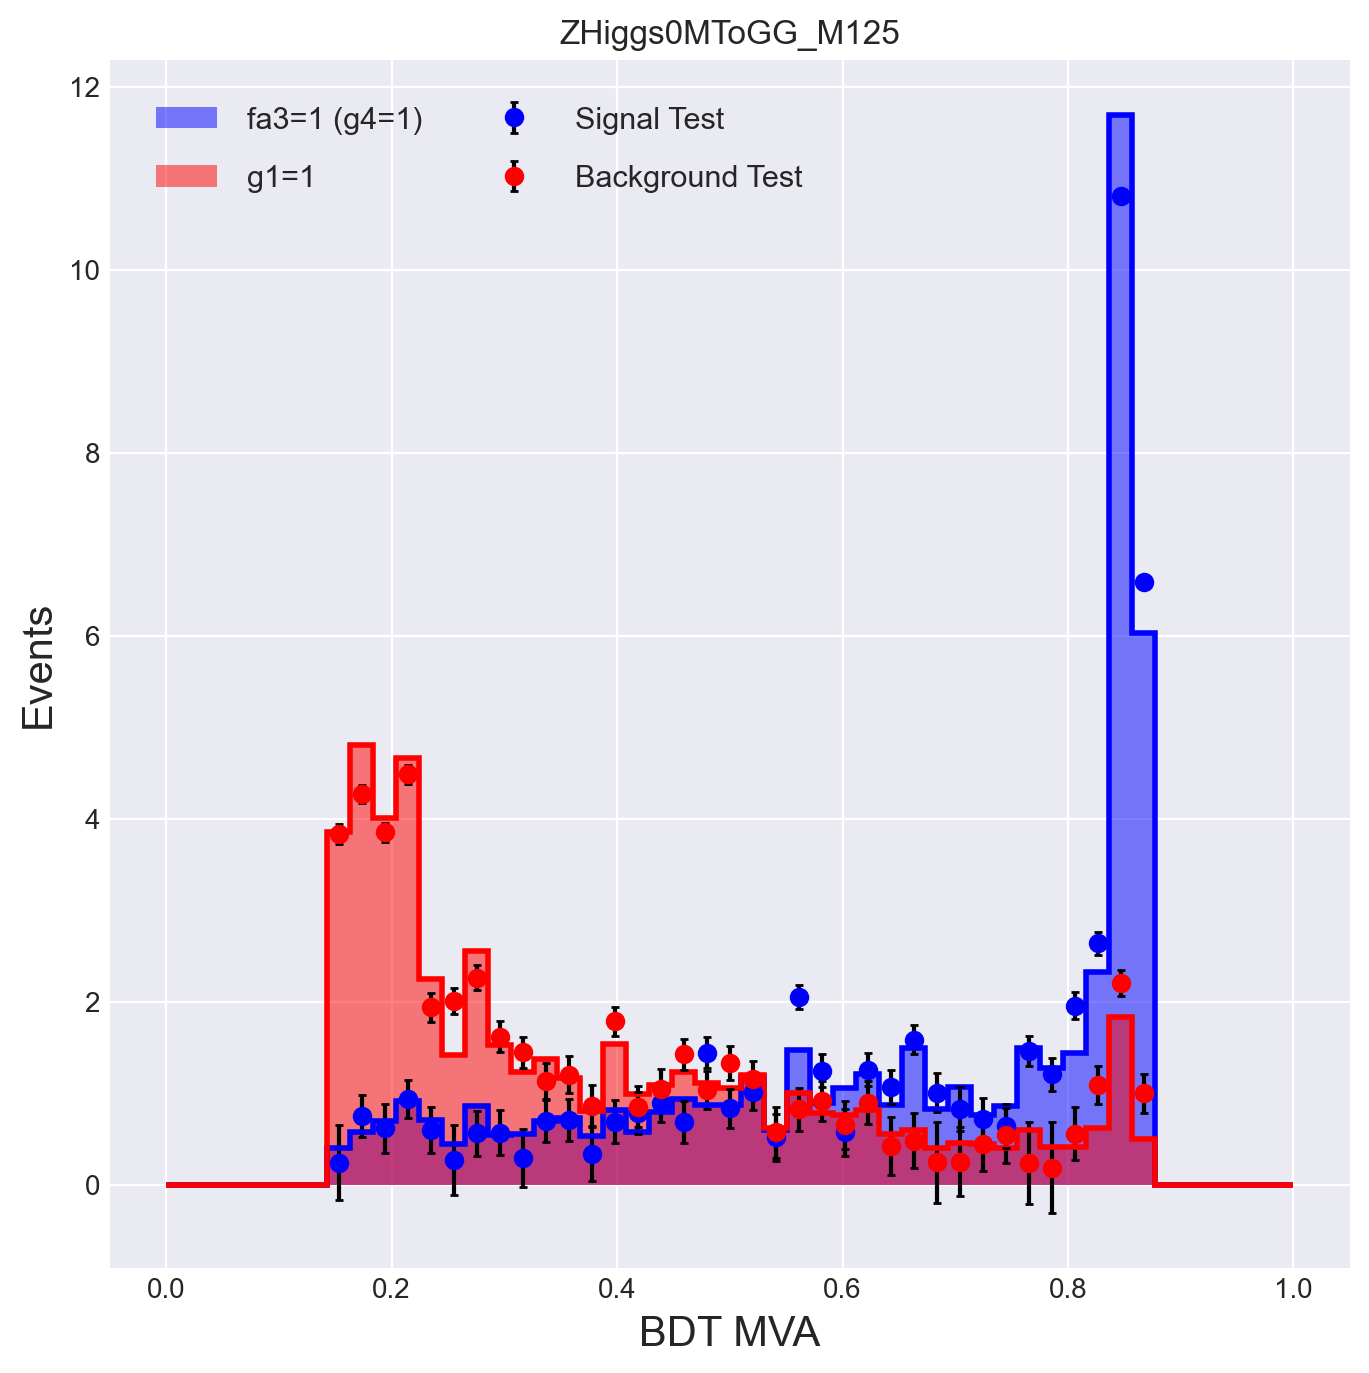

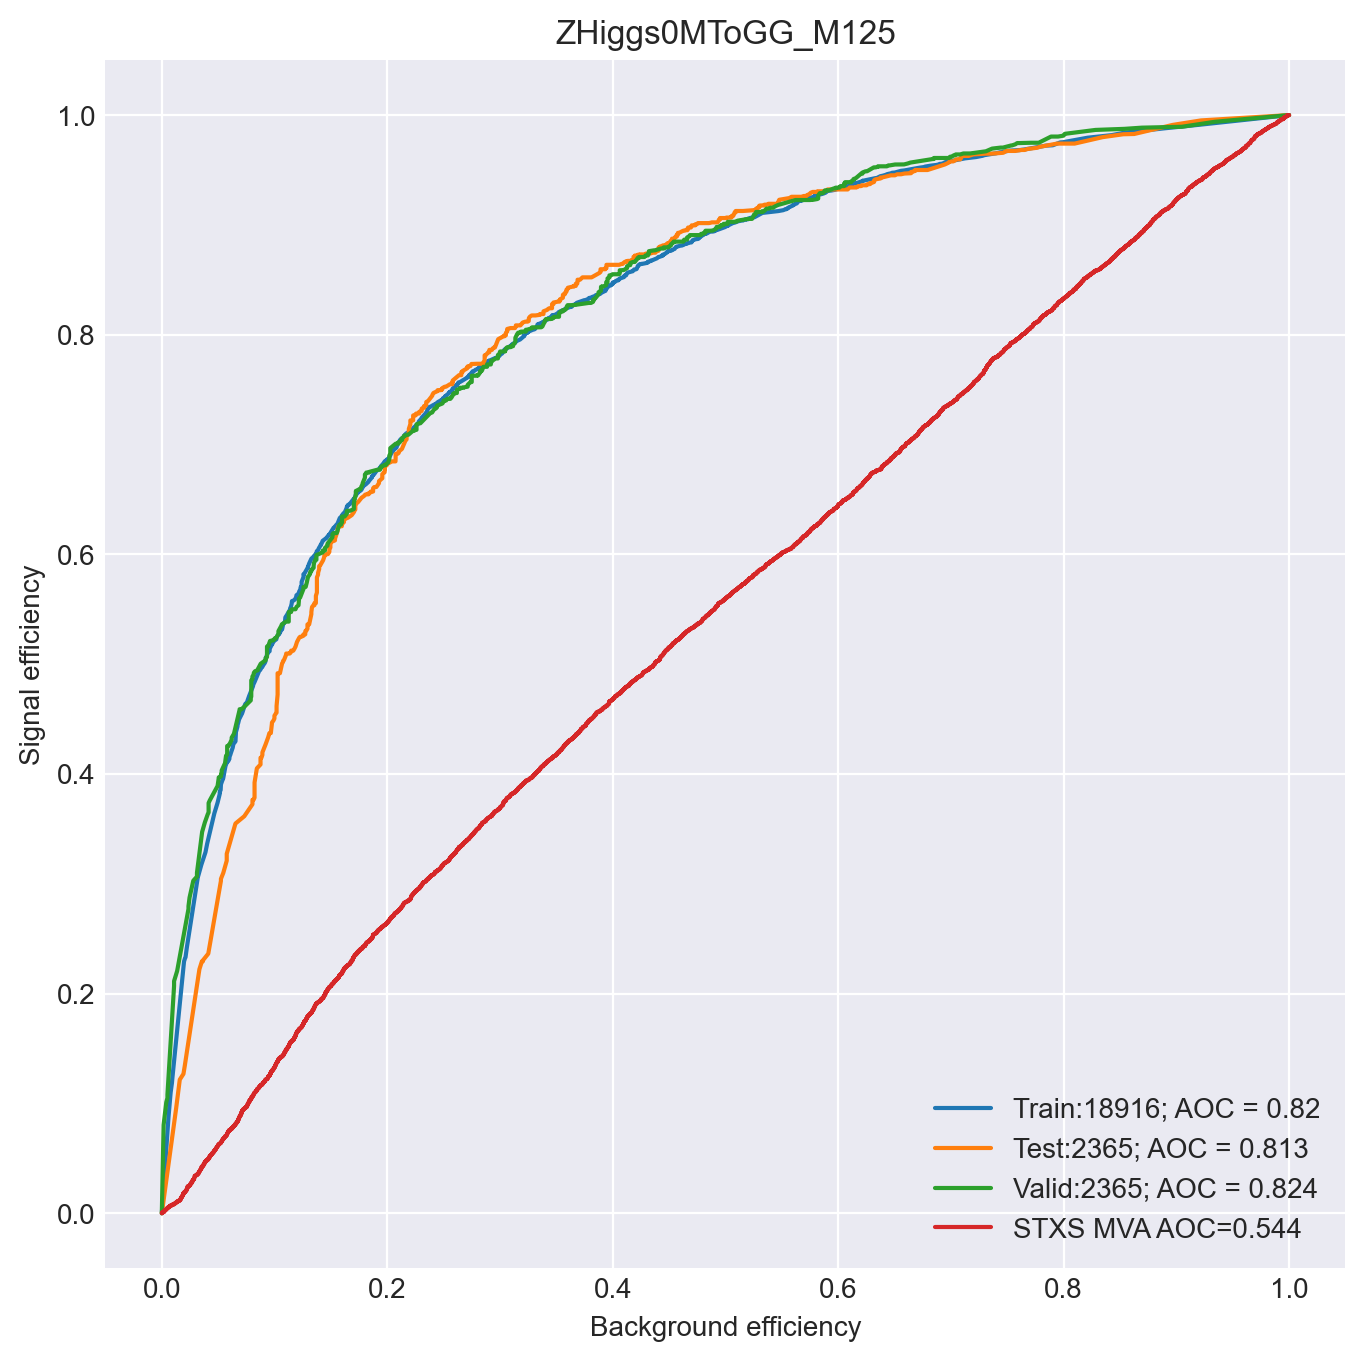

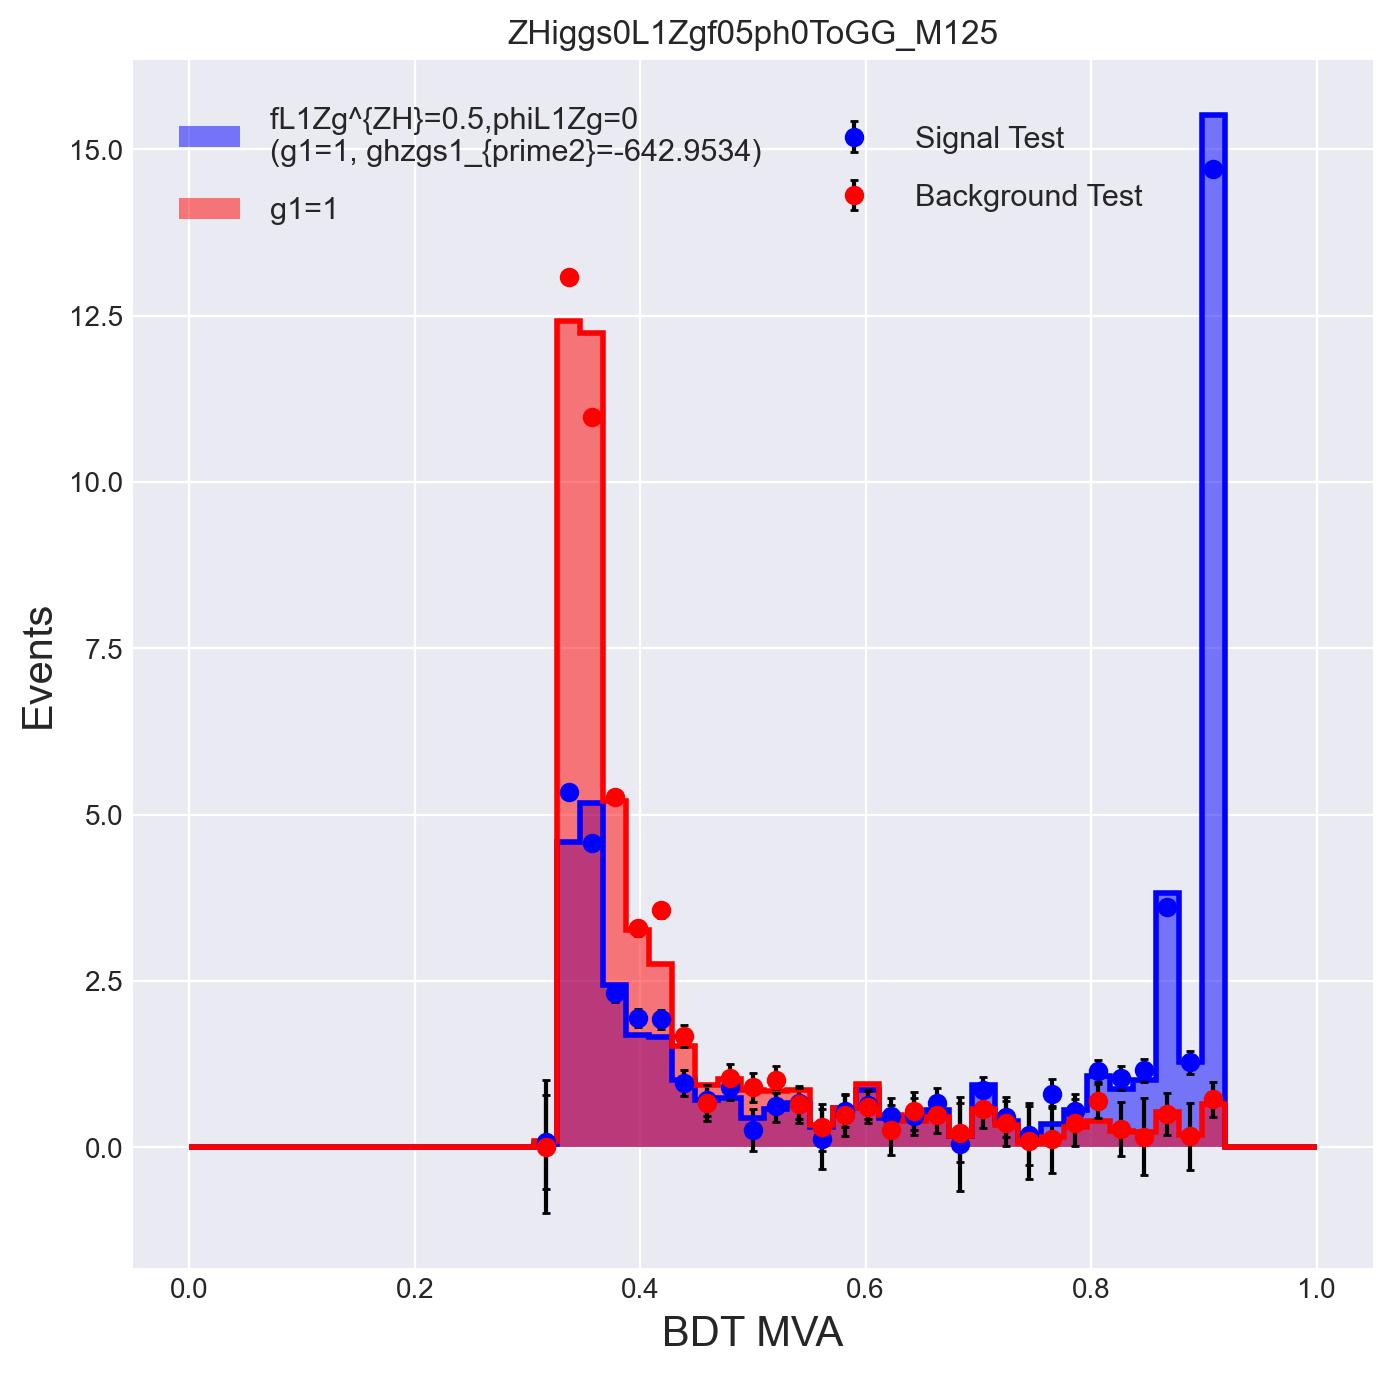

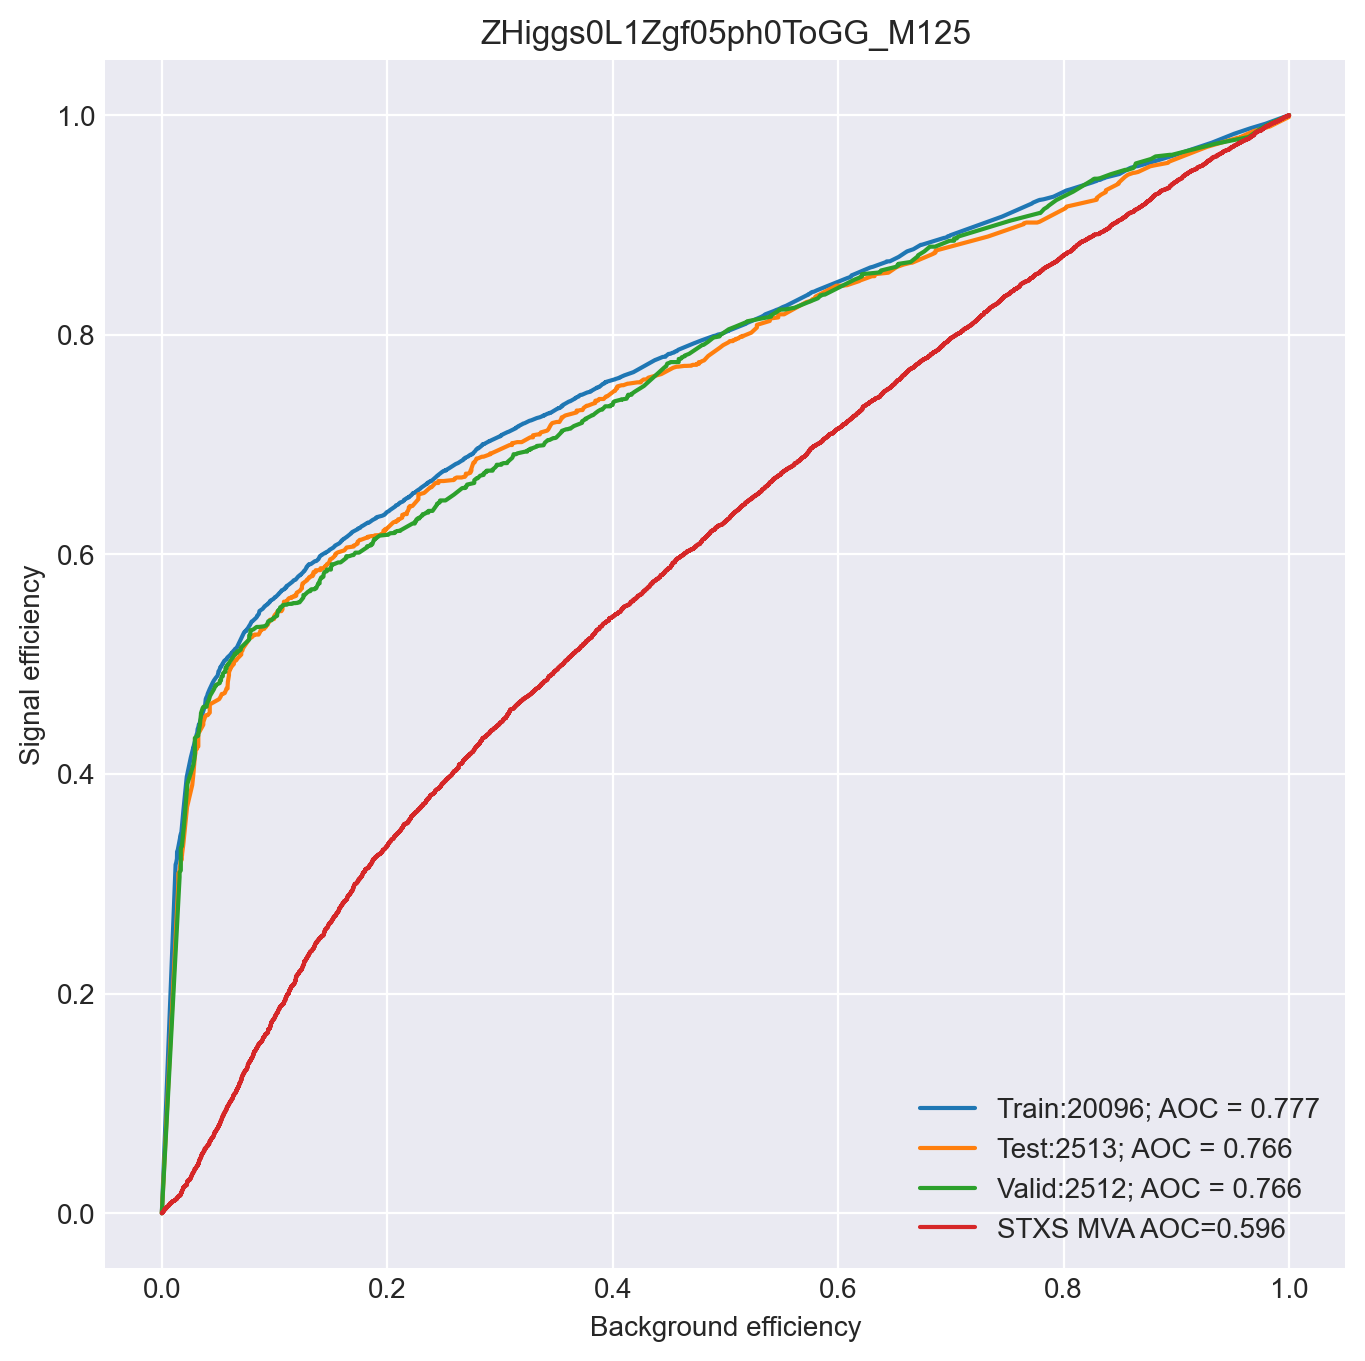

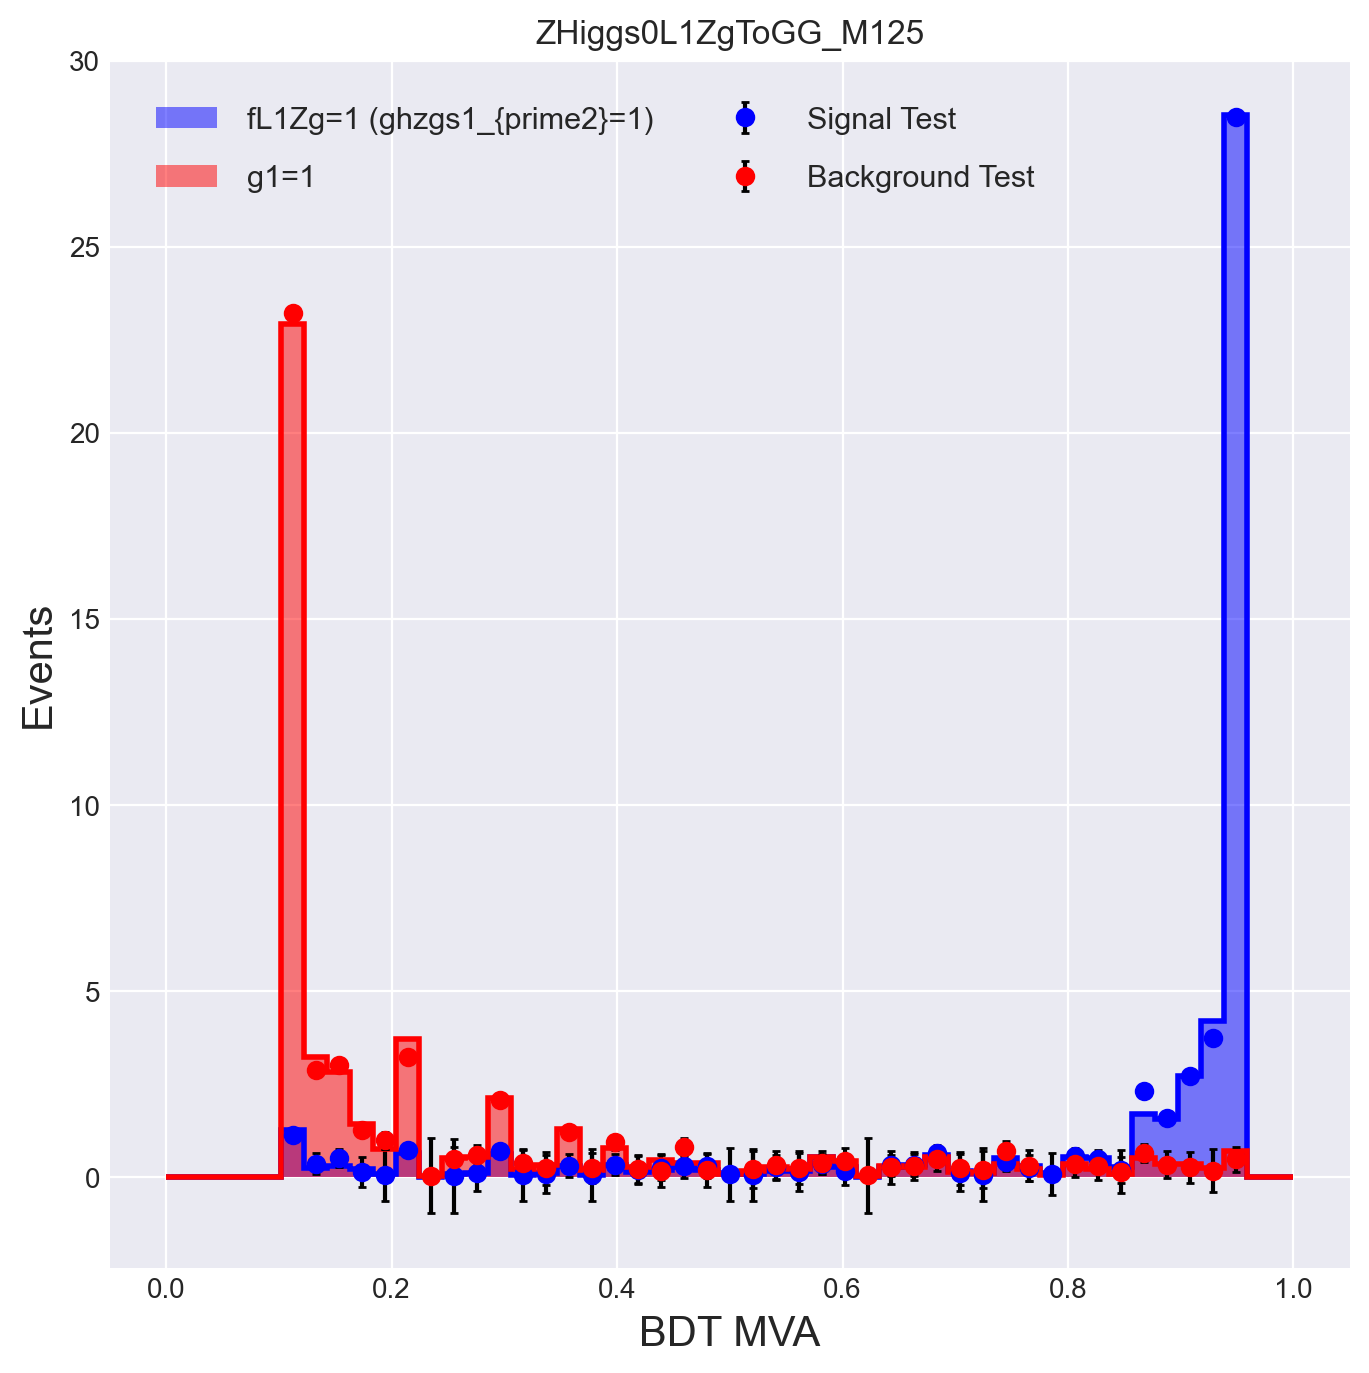

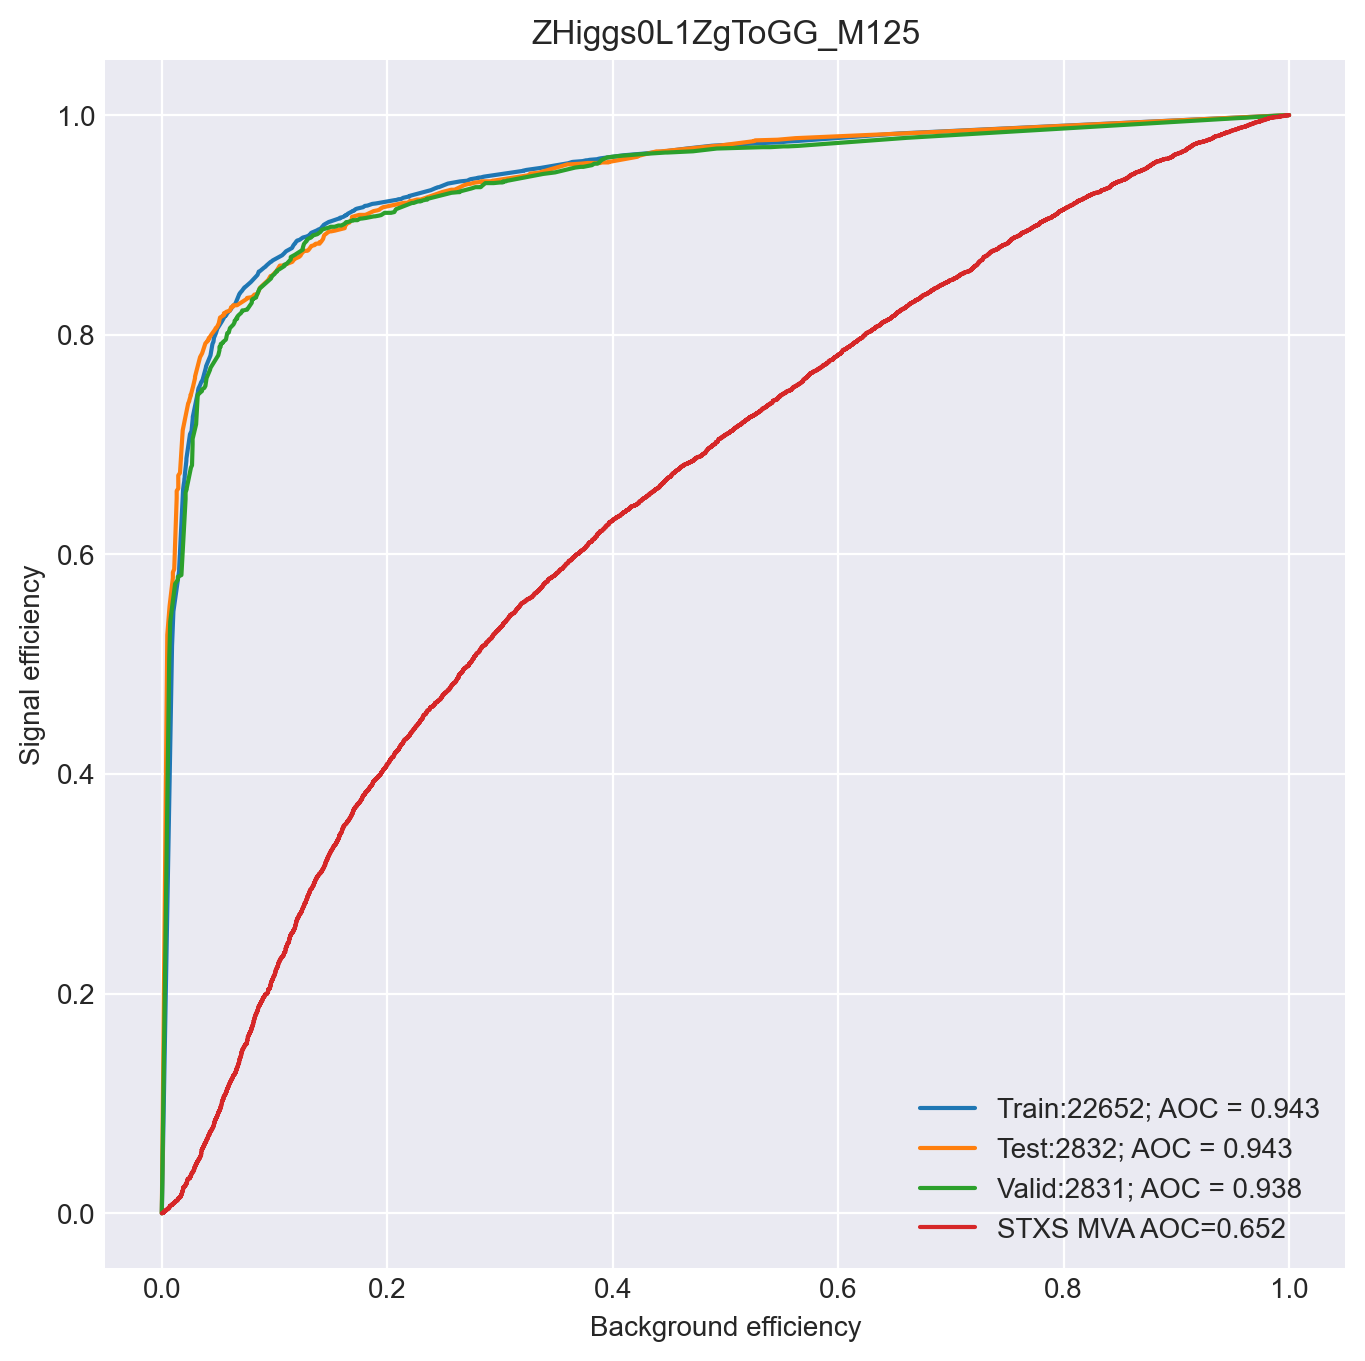

In [11]:
bdt_params = {
    'eval_metric': 'auc',
    'learning_rate': 0.5,
    'max_depth': 14,
    'objective': 'binary:logistic',
}
ZH_bdt_dict = {}

for sig in ZHsig_list:
#     folder_name = f'anom_models/2021_11_02/{sig}_model.xml'
    ZH_bdt_dict[sig] = train_bdt(
                       data = dataset_anom_ZH['zh']
                      ,signal      = [sig]
                      ,background  = ZHbackground
                      ,queryString = queryString
                      ,bdt_vars    = bdt_vars
                      ,params      = bdt_params
#                       ,prune       = 1 #remove this entire line to stop using pruning
    )
    ZH_bdt_dict[sig].train()
    ZH_bdt_dict[sig].AUC(quite=False)
    ZH_bdt_dict[sig].MVA_plt(AMS=False)
    ZH_bdt_dict[sig].ROC()
    ZH_bdt_dict[sig].save_tmva_xml(f"saved_models/{sig}.xml")

